In [23]:
import math
import numpy as np

In [24]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [25]:
import initdatuneq

In [26]:
delta=0.005 #with dtmin=0.001, accuracy of 1e-6 appears to be too much to ask. try 0.05
rad0=50
ecc0=0.5 #set ecc = 0 for circle, ecc < 1 for ellepse, = 1 for parabola, >1 for hyperbola
theta0= 0. #math.pi/6. #math.pi/6.
mass0_1=2.0
mass0_2=3.0
initdatequneq=initdatuneq.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0_1,mass0_2)
print(initdatequneq)

angle 0.0
0.5
(array([3.14159265, 0.        ]), 0.0, 50, 0.5, array([2., 3.]))


In [27]:
import getxyuvtwouneq_apper #unequal mass version

In [28]:
useperihelion=True

In [29]:
xyuvaequneq=getxyuvtwouneq_apper.getxyuvequneq(initdatequneq,useperihelion)
print(xyuvaequneq)
masses,xvec,avec=xyuvaequneq

initdat 50 [3.14159265 0.        ] 0.5 [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep 50
pi
zero
[-50.  50.]
[0. 0.]
ellipse
(array([2., 3.]), array([[-15.        ,   0.        ,   0.        ,  -0.        ,
         -0.32863353,   0.        ],
       [ 10.        ,   0.        ,   0.        ,  -0.        ,
          0.21908902,   0.        ]]), array([[ 0.0048, -0.    ,  0.    ],
       [-0.0032, -0.    ,  0.    ]]))


In [30]:
import RK4implicit

In [31]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [32]:
import OrbitDiffEqAdaptive

In [33]:
masses, xvec,avec=xyuvaequneq
ODEeq= OrbitDiffEqAdaptive.OrbitDiffEqAdaptive(masses,xvec,avec,0.0, delta)
ODEeq.print2D()
ODEeq.print2D()

[2. 3.] [[-15.           0.           0.          -0.          -0.32863353
    0.        ]
 [ 10.           0.           0.          -0.           0.21908902
    0.        ]] 0.0
[2. 3.] [[-15.           0.           0.          -0.          -0.32863353
    0.        ]
 [ 10.           0.           0.          -0.           0.21908902
    0.        ]] 0.0


In [34]:
print(xyuvaequneq)

(array([2., 3.]), array([[-15.        ,   0.        ,   0.        ,  -0.        ,
         -0.32863353,   0.        ],
       [ 10.        ,   0.        ,   0.        ,  -0.        ,
          0.21908902,   0.        ]]), array([[ 0.0048, -0.    ,  0.    ],
       [-0.0032, -0.    ,  0.    ]]))


In [35]:
import timestepAdaptive

In [36]:
import parabfns

In [37]:
import hyperbfns

In [38]:
numsteps=10000 #50000

#numsteps=6000*10

dt=.01
dtmax=1
dtmin = 0.001
outputevery=1
nptimes, npstar1x, npstar2x, npstar1a, npstar2a,nperr,npdt= timestepAdaptive.timestepAdaptive(numsteps,dt,dtmax,dtmin,xyuvaequneq,outputevery,delta)

0.01
[-7.19999976e-07  3.28633522e-03  0.00000000e+00]
[5.18399966e-13 1.07999992e-05 0.00000000e+00]
1.0799999712000007e-05
0.003286335301213193
45.64354706734446 False
0.023393077316699686
[-5.06296592e-06  7.68774712e-03  0.00000000e+00]
[2.56336239e-11 5.91014559e-05 0.00000000e+00]
5.910148148598751e-05
0.007687748791810741
19.511563666048147 False
0.04424894132684836
[-2.11898658e-05  1.45416624e-02  0.00000000e+00]
[4.49010415e-10 2.11459947e-04 0.00000000e+00]
0.00021146039577664977
0.014541677887253924
10.315178287058473 False
0.07136981624863552
[-6.32722100e-05  2.34543854e-02  0.00000000e+00]
[4.00337256e-09 5.50108193e-04 0.00000000e+00]
0.000550112196089742
0.023454470705810908
6.395369219005104 False
0.10214650077509212
[-0.00014818  0.03356827  0.        ]
[2.19582781e-08 1.12682877e-03 0.00000000e+00]
0.0011268507302252399
0.033568597382453144
4.468461946474042 False
0.13366125021454134
[-0.00028976  0.04392413  0.        ]
[8.39602662e-08 1.92932876e-03 0.00000000e+00

1.5299871400335183 False
0.31734408618269166
[-0.04689326  0.08609514  0.        ]
[0.00219898 0.00741237 0.        ]
0.009611351009515236
0.09803749797661727
1.5300268070465872 False
0.3176491363925798
[-0.04723518  0.08590514  0.        ]
[0.00223116 0.00737969 0.        ]
0.009610855854231534
0.09803497260789913
1.530066220347103 False
0.31795652743226277
[-0.04757588  0.08571406  0.        ]
[0.00226346 0.0073469  0.        ]
0.009610363926114496
0.0980324636338111
1.5301053797883484 False
0.3182662522743747
[-0.04791534  0.0855219   0.        ]
[0.00229588 0.007314   0.        ]
0.009609875225864855
0.09802997105918605
1.530144285255749 False
0.31857830388603237
[-0.04825357  0.08532867  0.        ]
[0.00232841 0.00728098 0.        ]
0.00960938975378657
0.09802749488682536
1.5301829366666762 False
0.31889267522970643
[-0.04859057  0.08513439  0.        ]
[0.00236104 0.00724786 0.        ]
0.00960890750979533
0.09802503511754194
1.5302213339697843 False
0.31920935926407
[-0.0489263

0.3704008726590972
[-0.07945153  0.05709476  0.        ]
[0.00631255 0.00325981 0.        ]
0.009572358194467959
0.09783842902698284
1.5331399072099934 False
0.37094537254500193
[-0.07964002  0.05683008  0.        ]
[0.00634253 0.00322966 0.        ]
0.009572190103879332
0.09783757000191354
1.533153368353959 False
0.37149148829130396
[-0.07982736  0.05656515  0.        ]
[0.00637241 0.00319962 0.        ]
0.009572023799126183
0.09783672009591379
1.5331666868323894 False
0.37203921601415535
[-0.08001357  0.05629998  0.        ]
[0.00640217 0.00316969 0.        ]
0.00957185926559036
0.09783587923451376
1.5331798638048546 False
0.3725885518669417
[-0.08019864  0.05603459  0.        ]
[0.00643182 0.00313987 0.        ]
0.009571696488708759
0.09783504734351979
1.533192900426755 False
0.3731394920402379
[-0.08038258  0.05576896  0.        ]
[0.00646136 0.00311018 0.        ]
0.00957153545397657
0.0978342243490312
1.5332057978490568 False
0.37369203276175034
[-0.08056539  0.0555031   0.      

0.09778253730598047
1.5340162377932676 False
0.4471936150468445
[-0.09476373  0.02410854  0.        ]
[0.00898017 0.00058122 0.        ]
0.009561387147929151
0.09778234578863994
1.5340192423306187 False
0.4479152050899064
[-0.09483337  0.02383238  0.        ]
[0.00899337 0.00056798 0.        ]
0.009561350264485765
0.0977821571887518
1.5340222011102755 False
0.44863817581850907
[-0.09490216  0.0235562   0.        ]
[0.00900642 0.00055489 0.        ]
0.009561313946206053
0.0977819714784175
1.5340251145693877 False
0.44936252683961647
[-0.0949701   0.02328001  0.        ]
[0.00901932 0.00054196 0.        ]
0.009561278187699996
0.09778178863009203
1.5340279831395718 False
0.4500882577771544
[-0.09503719  0.02300381  0.        ]
[0.00903207 0.00052918 0.        ]
0.009561242983646101
0.09778160861658035
1.5340308072469697 False
0.4508153682717782
[-0.09510344  0.0227276   0.        ]
[0.00904466 0.00051654 0.        ]
0.009561208328792462
0.09778143141104277
1.5340335873121613 False
0.45154

0.09777534392351696
1.5341290961587908 False
0.5453966547908212
[-0.09730188 -0.00961109  0.        ]
[9.46765524e-03 9.23731073e-05 0.00000000e+00]
0.00956002834879178
0.09777539746169166
1.5341282561267 False
0.5462864098289356
[-0.09727423 -0.00988751  0.        ]
[9.46227625e-03 9.77629280e-05 0.00000000e+00]
0.009560039176896911
0.09777545283401612
1.5341273873171462 False
0.5471775389355517
[-0.0972458  -0.01016393  0.        ]
[0.00945674 0.00010331 0.        ]
0.009560050365467372
0.09777551004964061
1.5341264895866564 False
0.5480700415165177
[-0.09721657 -0.01044035  0.        ]
[0.00945106 0.000109   0.        ]
0.009560061916347798
0.0977755691179949
1.5341255627873769 False
0.5489639169502588
[-0.09718655 -0.01071677  0.        ]
[0.00944522 0.00011485 0.        ]
0.009560073831443751
0.0977756300488202
1.5341246067665708 False
0.5498591645871688
[-0.09715573 -0.01099319  0.        ]
[0.00943924 0.00012085 0.        ]
0.009560086112716758
0.09777569285214377
1.534123621367

0.6614510604026743
[-0.08799412 -0.04268447  0.        ]
[0.00774296 0.00182196 0.        ]
0.00956492906663227
0.0978004553498207
1.5337351903267493 False
0.6624877039961646
[-0.08786164 -0.0429575   0.        ]
[0.00771967 0.00184535 0.        ]
0.009565014119924714
0.09780089017961296
1.533728371229776 False
0.6635252347226288
[-0.08772815 -0.04323044  0.        ]
[0.00769623 0.00186887 0.        ]
0.009565100224164276
0.09780133038033928
1.5337214679663915 False
0.6645636425424996
[-0.08759367 -0.04350328  0.        ]
[0.00767265 0.00189254 0.        ]
0.00956518738964083
0.09780177600453291
1.5337144797150495 False
0.6656029172655028
[-0.08745819 -0.04377603  0.        ]
[0.00764894 0.00191634 0.        ]
0.009565275626731212
0.09780222710516981
1.53370740564732 False
0.6666430485490862
[-0.0873217  -0.04404867  0.        ]
[0.00762508 0.00194029 0.        ]
0.009565364945890116
0.09780268373562208
1.5337002449286206 False
0.6676840258969211
[-0.08718421 -0.04432121  0.        ]
[

1.5320121465719032 False
0.7898520843792664
[-0.06366653 -0.0743864   0.        ]
[0.00405343 0.00553334 0.        ]
0.009586763742997117
0.09791202042138196
1.5319875879840705 False
0.7908645148104585
[-0.06339281 -0.07462189  0.        ]
[0.00401865 0.00556843 0.        ]
0.00958707383286148
0.09791360392132177
1.5319628120371518 False
0.7918750413061235
[-0.06311779 -0.07485674  0.        ]
[0.00398386 0.00560353 0.        ]
0.009587386672000545
0.09791520143471362
1.5319378176433072 False
0.7928836249397228
[-0.06284149 -0.07509094  0.        ]
[0.00394905 0.00563865 0.        ]
0.009587702274329517
0.09791681303192785
1.5319126037230124 False
0.7938902265093654
[-0.06256389 -0.0753245   0.        ]
[0.00391424 0.00567378 0.        ]
0.009588020653644627
0.09791843878271665
1.5318871692067473 False
0.7948948065390812
[-0.06228501 -0.07555739  0.        ]
[0.00387942 0.00570892 0.        ]
0.009588341823629554
0.09792007875624668
1.5318615130344853 False
0.7958973252800611
[-0.06200

1.5272480868986391 False
0.8860186453281071
[-0.02126055 -0.09589065  0.        ]
[0.00045201 0.00919502 0.        ]
0.009647028480127082
0.0982192877195059
1.5271949479858697 False
0.8864596872847464
[-0.02084948 -0.09598438  0.        ]
[0.0004347 0.009213  0.       ]
0.009647702066867284
0.09822271665387435
1.5271416339316177 False
0.886893208300346
[-0.0204377  -0.09607642  0.        ]
[0.0004177  0.00923068 0.        ]
0.009648377905806917
0.09822615693290111
1.5270881472280944 False
0.8873191717778391
[-0.02002523 -0.09616676  0.        ]
[0.00040101 0.00924805 0.        ]
0.009649055965689208
0.09822960839629367
1.5270344904038087 False
0.8877375416289842
[-0.01961209 -0.0962554   0.        ]
[0.00038463 0.0092651  0.        ]
0.009649736214792466
0.09823307088141175
1.5269806660231762 False
0.8881482822831198
[-0.01919828 -0.09634233  0.        ]
[0.00036857 0.00928184 0.        ]
0.009650418620932836
0.09823654422328197
1.5269266766862726 False
0.8885513586958583
[-0.01878382 

0.8786946552400636
[ 0.03054397 -0.09381764  0.        ]
[0.00093293 0.00880175 0.        ]
0.009734684554271577
0.098664505037382
1.5203035776966398 False
0.8781386119195459
[ 0.030941  -0.0936909  0.       ]
[0.00095735 0.00877798 0.        ]
0.00973533014522457
0.09866777663059288
1.5202531679779543 False
0.8775756457257624
[ 0.03133711 -0.09356259  0.        ]
[0.00098201 0.00875396 0.        ]
0.00973597312125537
0.0986710348646216
1.5202029674240534 False
0.8770058003530965
[ 0.03173232 -0.09343272  0.        ]
[0.00100694 0.00872967 0.        ]
0.009736613457303017
0.09867427961380319
1.520152977929793 False
0.8764291198561797
[ 0.03212661 -0.0933013   0.        ]
[0.00103212 0.00870513 0.        ]
0.009737251128816361
0.09867751075506699
1.5201032013497324 False
0.8758456486402915
[ 0.03251996 -0.09316833  0.        ]
[0.00105755 0.00868034 0.        ]
0.009737886111754784
0.09868072816793957
1.520053639498108 False
0.8752554314517595
[ 0.03291237 -0.09303383  0.        ]
[0.00

0.09894782917448347
1.5159503877087763 False
0.773990319455885
[ 0.07049084 -0.06944058  0.        ]
[0.00496896 0.00482199 0.        ]
0.009790952330135608
0.09894924118019101
1.515928755096194 False
0.7729434762890172
[ 0.07074001 -0.06918873  0.        ]
[0.00500415 0.00478708 0.        ]
0.00979122916490889
0.09895064004294712
1.5159073244487973 False
0.7718953209159074
[ 0.07098789 -0.06893637  0.        ]
[0.00503928 0.00475222 0.        ]
0.009791503417945917
0.09895202584053506
1.515886094557889 False
0.7708458880031155
[ 0.07123449 -0.0686835   0.        ]
[0.00507435 0.00471742 0.        ]
0.009791775104586058
0.09895339865101177
1.5158650642108722 False
0.7697952119267194
[ 0.07147981 -0.06843012  0.        ]
[0.00510936 0.00468268 0.        ]
0.009792044240234103
0.09895475855275533
1.515844232190523 False
0.7687433267722116
[ 0.07172384 -0.06817625  0.        ]
[0.00514431 0.004648   0.        ]
0.009792310840344303
0.09895610562438431
1.5158235972762217 False
0.7676902663

1.5144429335676608 False
0.643398726935233
[ 0.09222342 -0.03612597  0.        ]
[0.00850516 0.00130509 0.        ]
0.009810244639203337
0.09904667909225093
1.5144374488345211 False
0.6423704310961026
[ 0.09233333 -0.0358451   0.        ]
[0.00852544 0.00128487 0.        ]
0.009810314776067306
0.09904703315126256
1.514432035242521 False
0.6413432055584255
[ 0.09244227 -0.03556417  0.        ]
[0.00854557 0.00126481 0.        ]
0.00981038400119488
0.09904738260648223
1.5144266920808378 False
0.6403170578878297
[ 0.09255025 -0.03528318  0.        ]
[0.00856555 0.0012449  0.        ]
0.009810452323678448
0.0990477275038577
1.5144214186454488 False
0.6392919955249997
[ 0.09265727 -0.03500213  0.        ]
[0.00858537 0.00122515 0.        ]
0.009810519752526977
0.0990480678889143
1.5144162142388276 False
0.6382680257870841
[ 0.09276334 -0.03472103  0.        ]
[0.00860504 0.00120555 0.        ]
0.009810586296667827
0.09904840380676423
1.5144110781698046 False
0.63724515586908
[ 0.09286844 -0

0.5281081258006354
[ 0.09904663 -0.00195558  0.        ]
[9.81023554e-03 3.82430311e-06 0.00000000e+00]
0.009814059843040037
0.09906593684531549
1.5141430523613224 False
0.5272384642481408
[ 0.09905183 -0.00167274  0.        ]
[9.8112653e-03 2.7980660e-06 0.0000000e+00]
0.009814063366536372
0.09906595462890555
1.5141427805535208 False
0.5263702111874503
[ 0.09905622 -0.0013899   0.        ]
[9.81213471e-03 1.93182591e-06 0.00000000e+00]
0.009814066533571527
0.0990659706133823
1.5141425362437955 False
0.5255033667628249
[ 0.0990598  -0.00110706  0.        ]
[9.81284376e-03 1.22558317e-06 0.00000000e+00]
0.009814069344685587
0.09906598480147254
1.5141423193904429 False
0.5246379311026992
[ 0.09906257 -0.00082422  0.        ]
[9.81339246e-03 6.79338061e-07 0.00000000e+00]
0.00981407180035861
0.09906599719559991
1.514142129956396 False
0.5237739043201709
[ 0.09906453 -0.00054138  0.        ]
[9.81378081e-03 2.93090825e-07 0.00000000e+00]
0.00981407390100868
0.09906600779787525
1.5141419679

0.43169849342254113
[0.09346395 0.03280112 0.        ]
[0.00873551 0.00107591 0.        ]
0.009811422280264817
0.09905262379293553
1.5143465589923935 False
0.43100207520662487
[0.09336439 0.03308258 0.        ]
[0.00871691 0.00109446 0.        ]
0.009811367124315132
0.09905234537513553
1.5143508155401388 False
0.4303070828339836
[0.0932639 0.033364  0.       ]
[0.00869815 0.00111316 0.        ]
0.009811311198731047
0.09905206307155368
1.5143551315194952 False
0.4296135172437309
[0.09316246 0.03364538 0.        ]
[0.00867924 0.00113201 0.        ]
0.00981125449573254
0.09905177684288424
1.5143595075324063 False
0.42892137939868613
[0.09306007 0.0339267  0.        ]
[0.00866018 0.00115102 0.        ]
0.009811197007456893
0.09905148664940316
1.5143639441872407 False
0.4282306702856012
[0.09295673 0.03420798 0.        ]
[0.00864095 0.00117019 0.        ]
0.009811138725960998
0.0990511924509796
1.5143684420986143 False
0.4275413909153734
[0.09285244 0.0344892  0.        ]
[0.00862157 0.0011

0.3577860173900667
[0.07359531 0.0661794  0.        ]
[0.00541627 0.00437971 0.        ]
0.009795982509026703
0.09897465589243896
1.5155394949088077 False
0.35727916275642896
[0.07336125 0.06643703 0.        ]
[0.00538187 0.00441388 0.        ]
0.009795751692988505
0.0989734898494971
1.5155573500348 False
0.356774076968048
[0.07312593 0.06669421 0.        ]
[0.0053474  0.00444812 0.        ]
0.009795518574274634
0.09897231215988962
1.5155753839283377 False
0.35627076504461336
[0.07288934 0.06695093 0.        ]
[0.00531286 0.00448243 0.        ]
0.009795283136988391
0.09897112274289098
1.5155935978383592 False
0.3557692320429446
[0.07265148 0.0672072  0.        ]
[0.00527824 0.00451681 0.        ]
0.009795045365239625
0.09896992151780068
1.515611993013666 False
0.3552694830568875
[0.07241235 0.06746301 0.        ]
[0.00524355 0.00455126 0.        ]
0.009794805243147296
0.09896870840395612
1.515630570702729 False
0.3547715232172053
[0.07217194 0.06771834 0.        ]
[0.00520879 0.0045857

1.5192534146695376 False
0.31100859094639216
[0.03595174 0.09195125 0.        ]
[0.00129253 0.00845503 0.        ]
0.009747560327815909
0.09872973375744466
1.5192991441515897 False
0.3107604333448552
[0.03556687 0.0920976  0.        ]
[0.001265   0.00848197 0.        ]
0.009746970497941479
0.09872674661884427
1.5193451130229896 False
0.310514822489912
[0.03518099 0.09224248 0.        ]
[0.0012377  0.00850868 0.        ]
0.009746377664942185
0.09872374418012206
1.5193913201501363 False
0.3102717647469855
[0.03479411 0.09238589 0.        ]
[0.00121063 0.00853515 0.        ]
0.009745781844703812
0.09872072652034025
1.5194377643593846 False
0.31003126644517354
[0.03440623 0.0925278  0.        ]
[0.00118379 0.00856139 0.        ]
0.0097451830536258
0.0987176937211653
1.5194844444369313 False
0.30979333387621105
[0.03401737 0.09266822 0.        ]
[0.00115718 0.0085874  0.        ]
0.009744581308623608
0.0987146458668804
1.519531359128608 False
0.3095579732934263
[0.03362753 0.09280714 0.    

0.30089402060867154
[-0.01511898  0.0971266   0.        ]
[0.00022858 0.00943358 0.        ]
0.009662160236025426
0.09829628800735776
1.5259986215224328 False
0.30098482658901915
[-0.01553884  0.09705664  0.        ]
[0.00024146 0.00941999 0.        ]
0.00966144658740844
0.09829265785097298
1.5260549798889702 False
0.3010784397756711
[-0.01595815  0.09698491  0.        ]
[0.00025466 0.00940607 0.        ]
0.009660734493677
0.09828903547027511
1.5261112216872195 False
0.30117485691682633
[-0.0163769   0.09691141  0.        ]
[0.0002682  0.00939182 0.        ]
0.00966002399398469
0.09828542106530698
1.5261673437846963 False
0.3012740746776818
[-0.01679508  0.09683615  0.        ]
[0.00028207 0.00937724 0.        ]
0.009659315127123383
0.09828181483429874
1.526223343076205 False
0.3013760896411194
[-0.01721268  0.09675914  0.        ]
[0.00029628 0.00936233 0.        ]
0.009658607931515554
0.09827821697362826
1.5262792164844692 False
0.3014808983084081
[-0.01762967  0.09668039  0.        

0.09794783399295695
1.5314274332068019 False
0.33197146431932734
[-0.06008163  0.07735379  0.        ]
[0.0036098  0.00598361 0.        ]
0.009593411305877923
0.09794596115143249
1.5314567158934476 False
0.3323681848001294
[-0.06037054  0.07712616  0.        ]
[0.0036446  0.00594844 0.        ]
0.00959304741672675
0.09794410353220223
1.5314857616791882 False
0.3327669571848067
[-0.06065816  0.07689781  0.        ]
[0.00367941 0.00591327 0.        ]
0.00959268650517404
0.09794226107852544
1.531514571424251 False
0.33316777485192595
[-0.06094449  0.07666876  0.        ]
[0.00371423 0.0058781  0.        ]
0.009592328559750677
0.09794043373270651
1.5315431460041469 False
0.3335706312030174
[-0.06122952  0.07643899  0.        ]
[0.00374905 0.00584292 0.        ]
0.009591973568802127
0.09793862143609194
1.5315714863097165 False
0.33397551966306516
[-0.06151326  0.07620853  0.        ]
[0.00378388 0.00580774 0.        ]
0.009591621520496382
0.09793682412911081
1.5315995932464987 False
0.33438

[-0.08608533  0.04643531  0.        ]
[0.00741068 0.00215624 0.        ]
0.009566921608327148
0.09781064159040748
1.5335754633748446 False
0.39382938983765436
[-0.08623071  0.0461636   0.        ]
[0.00743574 0.00213108 0.        ]
0.00956681381442744
0.09781009055525632
1.5335841031172524 False
0.39443689514633984
[-0.08637507  0.04589178  0.        ]
[0.00746065 0.00210606 0.        ]
0.009566707278177725
0.09780954594607688
1.5335926422017754 False
0.39504588747581937
[-0.08651839  0.04561983  0.        ]
[0.00748543 0.00208117 0.        ]
0.00956660198782313
0.09780900770288557
1.533601081565565 False
0.39565636438389473
[-0.0866607   0.04534778  0.        ]
[0.00751008 0.00205642 0.        ]
0.009566497931688565
0.09780847576610406
1.5336094221394985 False
0.39626832346119323
[-0.08680199  0.04507561  0.        ]
[0.00753458 0.00203181 0.        ]
0.009566395098181853
0.09780795007657533
1.533617664847926 False
0.3968817623310085
[-0.08694225  0.04480333  0.        ]
[0.00755896 0

0.4753490384130001
[-0.09681365  0.0136918   0.        ]
[0.00937288 0.00018747 0.        ]
0.009560348098259779
0.09777703257033207
1.5341026011615086 False
0.4761225278704491
[-0.09685224  0.01341539  0.        ]
[0.00938036 0.00017997 0.        ]
0.009560329342909159
0.09777693666151113
1.5341041059537093 False
0.4768973928987765
[-0.09689003  0.01313897  0.        ]
[0.00938768 0.00017263 0.        ]
0.009560310995293093
0.09777684283762231
1.5341055780365553 False
0.47767363357070425
[-0.09692702  0.01286256  0.        ]
[0.00939485 0.00016545 0.        ]
0.009560293052460502
0.0977767510835807
1.534107017646539 False
0.47845124996609745
[-0.09696321  0.01258614  0.        ]
[0.00940186 0.00015841 0.        ]
0.00956027551151854
0.09777666138459903
1.5341084250154888 False
0.47923024217168764
[-0.0969986   0.01230973  0.        ]
[0.00940873 0.00015153 0.        ]
0.0095602583696361
0.0977765737262055
1.5341098003702893 False
0.4800106102807711
[-0.0970332   0.01203331  0.        

0.5751975973617534
[-0.09598338 -0.01864864  0.        ]
[0.00921281 0.00034777 0.        ]
0.009560581307273658
0.09777822511824225
1.5340838905452259 False
0.576131804004781
[-0.0959294  -0.01892497  0.        ]
[0.00920245 0.00035815 0.        ]
0.009560605190648686
0.09777834724850225
1.5340819743943634 False
0.5770673477417084
[-0.0958746 -0.0192013  0.       ]
[0.00919194 0.00036869 0.        ]
0.009560629525584879
0.09777847168771293
1.5340800220223665 False
0.5780042267469738
[-0.09581898 -0.01947762  0.        ]
[0.00918128 0.00037938 0.        ]
0.009560654315896614
0.09777859845537067
1.5340780331236274 False
0.5789424391453366
[-0.09576253 -0.01975394  0.        ]
[0.00917046 0.00039022 0.        ]
0.009560679565466608
0.097778727571321
1.5340760073870685 False
0.5798819830110468
[-0.09570525 -0.02003025  0.        ]
[0.00915949 0.00040121 0.        ]
0.009560705278237821
0.09777885905571726
1.5340739444967915 False
0.5808228563670707
[-0.09564714 -0.02030655  0.        ]
[

0.6957474656090367
[-0.08313106 -0.05155132  0.        ]
[0.00691077 0.00265754 0.        ]
0.009568312594087669
0.09781775193740484
1.5334639881724885 False
0.6968070528690837
[-0.08296456 -0.05182006  0.        ]
[0.00688312 0.00268532 0.        ]
0.009568437780938546
0.09781839183373721
1.5334539567462562 False
0.6978671125155126
[-0.08279698 -0.05208863  0.        ]
[0.00685534 0.00271322 0.        ]
0.009568564397698511
0.09781903903483469
1.53344381093933 False
0.698927628756182
[-0.0826283  -0.05235701  0.        ]
[0.00682744 0.00274126 0.        ]
0.00956869245731097
0.09781969360671179
1.533433549721402 False
0.6999885855954379
[-0.08245853 -0.05262521  0.        ]
[0.00679941 0.00276941 0.        ]
0.009568821972780283
0.09782035561569118
1.5334231720574403 False
0.7010499668325992
[-0.08228766 -0.05289323  0.        ]
[0.00677126 0.00279769 0.        ]
0.009568952957200005
0.09782102512854793
1.5334126769054297 False
0.702111756060183
[-0.0821157  -0.05316105  0.        ]
[

0.8094008157390834
[-0.05803712 -0.07889921  0.        ]
[0.00336831 0.00622509 0.        ]
0.00959339273930973
0.0979458663717348
1.5314581978447532 False
0.8103682813076346
[-0.05773797 -0.0791207   0.        ]
[0.00333367 0.00626009 0.        ]
0.009593759404590039
0.0979477381290147
1.531428932053777 False
0.8113330271342198
[-0.05743754 -0.0793414   0.        ]
[0.00329907 0.00629506 0.        ]
0.009594129067728165
0.09794962515358681
1.5313994286838488 False
0.8122950091786872
[-0.05713582 -0.0795613   0.        ]
[0.0032645 0.00633   0.       ]
0.00959450173960661
0.0979515275001192
1.5313696869078173 False
0.8132541831644562
[-0.05683281 -0.07978038  0.        ]
[0.00322997 0.00636491 0.        ]
0.009594877430902593
0.09795344522222071
1.5313397059154437 False
0.8142105045814422
[-0.05652851 -0.07999865  0.        ]
[0.00319547 0.00639978 0.        ]
0.009595256152085252
0.09795537837242656
1.5313094849136275 False
0.8151639286890556
[-0.05622292 -0.08021609  0.        ]
[0.0

0.8920560843069238
[-0.01473291 -0.09716371  0.        ]
[0.00021706 0.00944079 0.        ]
0.009657845056606454
0.09827433569659198
1.5263394958283274 False
0.892375122718367
[-0.01431222 -0.09723019  0.        ]
[0.00020484 0.00945371 0.        ]
0.00965855015517165
0.09827792303041233
1.526283781491619 False
0.8926861288545592
[-0.01389102 -0.09729489  0.        ]
[0.00019296 0.0094663  0.        ]
0.00965925696414093
0.09828151893484822
1.5262279381277821 False
0.8929890750681315
[-0.01346933 -0.09735781  0.        ]
[0.00018142 0.00947854 0.        ]
0.009659965445546474
0.09828512321580755
1.5261719687794515 False
0.8932839343467719
[-0.01304716 -0.09741893  0.        ]
[0.00017023 0.00949045 0.        ]
0.009660675561044316
0.09828873567731104
1.5261158765177398 False
0.8935706803202765
[-0.01262451 -0.09747825  0.        ]
[0.00015938 0.00950201 0.        ]
0.00966138727192044
0.0982923561215237
1.526059664441735 False
0.8938492872674738
[-0.01220141 -0.09753577  0.        ]
[0

0.869844057542856
[ 0.03628461 -0.09180047  0.        ]
[0.00131657 0.00842733 0.        ]
0.009743900186254761
0.0987111958505962
1.5195844676730659 False
0.869190801806629
[ 0.03666745 -0.09165153  0.        ]
[0.0013445 0.0084    0.       ]
0.009744505038933576
0.09871425955217197
1.5195373057599924 False
0.8685312975897459
[ 0.03704926 -0.09150114  0.        ]
[0.00137265 0.00837246 0.        ]
0.009745106960114082
0.09871730831072169
1.519490376782371 False
0.8678655929153266
[ 0.03743003 -0.09134932  0.        ]
[0.00140101 0.0083447  0.        ]
0.009745705932311988
0.09872034203907515
1.5194436820389814 False
0.8671937360261418
[ 0.03780975 -0.09119608  0.        ]
[0.00142958 0.00831672 0.        ]
0.009746301938558187
0.09872336065267524
1.5193972227882746 False
0.8665157753752205
[ 0.03818841 -0.09104142  0.        ]
[0.00145836 0.00828854 0.        ]
0.009746894962397733
0.09872636406957229
1.5193510002484774 False
0.8658317596164972
[ 0.03856602 -0.09088535  0.        ]
[0

1.5159137749015816 False
0.7722119810555323
[ 0.07091317 -0.06901263  0.        ]
[0.00502868 0.00476274 0.        ]
0.009791420869688532
0.09895160872713758
1.515892484513618 False
0.7711629303002268
[ 0.07116016 -0.06875991  0.        ]
[0.00506377 0.00472793 0.        ]
0.009791693329713714
0.09895298545124201
1.5158713940360176 False
0.7701126260309836
[ 0.07140586 -0.06850669  0.        ]
[0.0050988  0.00469317 0.        ]
0.009791963234088232
0.09895434924291217
1.5158505022531295 False
0.7690611024210536
[ 0.07165028 -0.06825297  0.        ]
[0.00513376 0.00465847 0.        ]
0.009792230598254036
0.0989557001807073
1.515829807945156 False
0.7680083933531255
[ 0.07189343 -0.06799876  0.        ]
[0.00516866 0.00462383 0.        ]
0.009792495437699705
0.09895703834341298
1.5158093098891199 False
0.7669545324194434
[ 0.07213529 -0.06774406  0.        ]
[0.0052035  0.00458926 0.        ]
0.009792757767965536
0.09895836381006679
1.515789006858467 False
0.7658995529218948
[ 0.07237588

0.09904621113816842
1.514444603951095 False
0.6437094628810769
[ 0.09219004 -0.03621078  0.        ]
[0.008499   0.00131122 0.        ]
0.009810223278523562
0.09904657126081429
1.5144390975939253 False
0.6426808453366561
[ 0.09230024 -0.03592993  0.        ]
[0.00851933 0.00129096 0.        ]
0.00981029369251642
0.09904692671918912
1.5144336625937869 False
0.6416532957842228
[ 0.09240948 -0.03564901  0.        ]
[0.00853951 0.00127085 0.        ]
0.009810363192008969
0.09904727755980458
1.5144282982379829 False
0.6406268218274276
[ 0.09251775 -0.03536804  0.        ]
[0.00855953 0.0012509  0.        ]
0.009810431786122042
0.09904762382875242
1.5144230038202762 False
0.6396014309445249
[ 0.09262506 -0.03508701  0.        ]
[0.0085794 0.0012311 0.       ]
0.00981049948388809
0.09904796557167689
1.5144177786413113 False
0.638577130489823
[ 0.09273141 -0.03480592  0.        ]
[0.00859911 0.00121145 0.        ]
0.009810566294258444
0.09904830283381157
1.5144126220080505 False
0.637553927695

0.5301154230630059
[ 0.09903159 -0.00260668  0.        ]
[9.80725562e-03 6.79475697e-06 0.00000000e+00]
0.009814050373884855
0.09906588905311886
1.5141437828269062 False
0.5292425198260428
[ 0.09903865 -0.00232384  0.        ]
[9.80865451e-03 5.40021117e-06 0.00000000e+00]
0.009814054720331344
0.0990659109902662
1.5141434475350293 False
0.5283710246859344
[ 0.0990449 -0.002041   0.       ]
[9.80989305e-03 4.16566143e-06 0.00000000e+00]
0.009814058708842976
0.09906593112085998
1.5141431398550191 False
0.5275009378252691
[ 0.09905035 -0.00175815  0.        ]
[9.81097123e-03 3.09110820e-06 0.00000000e+00]
0.009814062340099586
0.09906594944833258
1.5141428597343818 False
0.5266322594096567
[ 0.09905498 -0.00147531  0.        ]
[9.81188906e-03 2.17655187e-06 0.00000000e+00]
0.009814065614719964
0.09906596597580808
1.5141426071253372 False
0.5257649895882353
[ 0.0990588  -0.00119247  0.        ]
[9.81264654e-03 1.42199280e-06 0.00000000e+00]
0.009814068533262435
0.09906598070610534
1.5141423

[0.00886658 0.00094523 0.        ]
0.00981180241171251
0.09905454261018275
1.514317224100534 False
0.43612005852156943
[0.09406976 0.03102631 0.        ]
[0.00884912 0.00096263 0.        ]
0.009811752647373809
0.09905429141321344
1.5143210643369522 False
0.435414674798076
[0.09397611 0.03130805 0.        ]
[0.00883151 0.00098019 0.        ]
0.009811702167771403
0.09905403660513488
1.5143249597990045 False
0.43471071153092417
[0.09388152 0.03158974 0.        ]
[0.00881374 0.00099791 0.        ]
0.009811650965711367
0.09905377814960602
1.5143289110431233 False
0.4340081695149407
[0.093786  0.0318714 0.       ]
[0.00879581 0.00101579 0.        ]
0.009811599033919916
0.09905351600988183
1.5143329186319405 False
0.4333070495672531
[0.09368954 0.03215301 0.        ]
[0.00877773 0.00103382 0.        ]
0.009811546365044015
0.0990532501488165
1.5143369831342401 False
0.432607352527513
[0.09359215 0.03243458 0.        ]
[0.00875949 0.001052   0.        ]
0.00981149295164981
0.09905298052885542
1

0.36206156321856225
[0.07548985 0.06402417 0.        ]
[0.00569872 0.00409909 0.        ]
0.009797811936173158
0.09898389735797009
1.5153979991061863 False
0.3615402125266033
[0.07526622 0.06428527 0.        ]
[0.005665  0.0041326 0.       ]
0.009797599622989192
0.09898282488891288
1.515414418292699 False
0.36102059045270096
[0.07504134 0.06454597 0.        ]
[0.0056312  0.00416618 0.        ]
0.009797385139070754
0.09898174144290832
1.5154310058943397 False
0.3605027017048148
[0.07481521 0.06480627 0.        ]
[0.00559732 0.00419985 0.        ]
0.00979716846855377
0.09898064693945868
1.5154477631546215 False
0.35998655102872157
[0.07458783 0.06506616 0.        ]
[0.00556334 0.00423361 0.        ]
0.009796949595563164
0.09897954129800342
1.5154646913182426 False
0.3594721432079448
[0.07435919 0.06532564 0.        ]
[0.00552929 0.00426744 0.        ]
0.009796728504211129
0.09897842443791036
1.5154817916312229 False
0.3589594830636976
[0.0741293  0.06558469 0.        ]
[0.00549515 0.0043

0.31316627028382293
[0.03910685 0.09068072 0.        ]
[0.00152935 0.00822299 0.        ]
0.009752339211581404
0.0987539326385608
1.5189268517437142 False
0.3128972198511273
[0.03873067 0.09083892 0.        ]
[0.00150007 0.00825171 0.        ]
0.009751774859398661
0.09875107523160778
1.5189708025780433 False
0.31263066205408535
[0.03835343 0.09099573 0.        ]
[0.00147099 0.00828022 0.        ]
0.00975120739184582
0.09874820196766025
1.5190149998794364 False
0.31236660351976064
[0.03797511 0.09115113 0.        ]
[0.00144211 0.00830853 0.        ]
0.009750636820605767
0.09874531290449065
1.5190594428019522 False
0.31210505084745377
[0.03759573 0.09130512 0.        ]
[0.00141344 0.00833662 0.        ]
0.009750063157859467
0.0987424081023927
1.519104130460894 False
0.3118460106076828
[0.0372153  0.09145768 0.        ]
[0.00138498 0.00836451 0.        ]
0.00974948641629058
0.09873948762420524
1.5191490619324282 False
0.31158948934115155
[0.03683382 0.09160882 0.        ]
[0.00135673 0.00

0.09833779299811746
1.5253545501358927 False
0.300122673432784
[-0.01076486  0.09774309  0.        ]
[0.00011588 0.00955371 0.        ]
0.009669593134540083
0.0983340893817606
1.525412000488028 False
0.3001843906412438
[-0.0111896   0.09769165  0.        ]
[0.00012521 0.00954366 0.        ]
0.009668865827023327
0.09833039116683777
1.5254693713716045 False
0.3002489435723623
[-0.01161392  0.0976384   0.        ]
[0.00013488 0.00953326 0.        ]
0.009668139651867809
0.0983266985709772
1.5255266593917254 False
0.30031632986564627
[-0.01203782  0.09758333  0.        ]
[0.00014491 0.00952251 0.        ]
0.009667414651484267
0.09832301181048243
1.525583861173058 False
0.30038654707145473
[-0.01246128  0.09752644  0.        ]
[0.00015528 0.00951141 0.        ]
0.009666690868007217
0.09831933110028372
1.5256409733606002 False
0.3004595926515174
[-0.01288429  0.09746776  0.        ]
[0.000166   0.00949996 0.        ]
0.009665968343286167
0.09831565665389295
1.5256979926203902 False
0.30053546

0.3268927321617738
[-0.05611569  0.08030921  0.        ]
[0.00314897 0.00644957 0.        ]
0.009598540158638771
0.09797213970634086
1.5310475044191756 False
0.3272615182801657
[-0.05642177  0.08009194  0.        ]
[0.00318342 0.00641472 0.        ]
0.009598135669001829
0.09797007537509517
1.5310797651803305 False
0.32763244631322364
[-0.05672657  0.07987384  0.        ]
[0.0032179  0.00637983 0.        ]
0.00959773428972696
0.09796802687472561
1.531111779885177 False
0.32800550938437856
[-0.05703007  0.07965492  0.        ]
[0.00325243 0.00634491 0.        ]
0.00959733601225369
0.09796599416253424
1.5311435491701002 False
0.3283807006327157
[-0.05733229  0.07943519  0.        ]
[0.00328699 0.00630995 0.        ]
0.009596940827769017
0.09796397719452297
1.5311750736921519 False
0.328758013213594
[-0.05763321  0.07921465  0.        ]
[0.00332159 0.00627496 0.        ]
0.009596548727216898
0.0979619759254421
1.5312063541282948 False
0.3291374402992375
[-0.05793285  0.07899332  0.        

0.3853051141528817
[-0.08405224  0.05003701  0.        ]
[0.00706478 0.0025037  0.        ]
0.00956848097484926
0.09781861261973235
1.5334504955935289 False
0.3858910649876734
[-0.08421157  0.04976712  0.        ]
[0.00709159 0.00247677 0.        ]
0.009568355294389364
0.09781797020174444
1.5334605665056518 False
0.38647854144961896
[-0.08436984  0.04949709  0.        ]
[0.00711827 0.00244996 0.        ]
0.009568231035588137
0.09781733504644326
1.5334705236937873 False
0.3870675406113819
[-0.08452704  0.0492269   0.        ]
[0.00714482 0.00242329 0.        ]
0.009568108185630983
0.09781670708846717
1.5334803681781817 False
0.3876580595804441
[-0.08468318  0.04895657  0.        ]
[0.00717124 0.00239675 0.        ]
0.0095679867317805
0.09781608626284584
1.5334901009730495 False
0.3882500954989807
[-0.08483827  0.04868609  0.        ]
[0.00719753 0.00237034 0.        ]
0.009567866661377596
0.09781547250500607
1.53349972308648 False
0.3888436455437287
[-0.0849923   0.04841547  0.        ]

0.4674606338095616
[-0.09636918  0.01653924  0.        ]
[0.00928702 0.00027355 0.        ]
0.009560565805662205
0.09777814584896875
1.5340851342353616 False
0.4682199544604591
[-0.09641609  0.01626286  0.        ]
[0.00929606 0.00026448 0.        ]
0.009560542663368945
0.09777802750807026
1.5340869909409813 False
0.4689806504173272
[-0.09646218  0.01598647  0.        ]
[0.00930495 0.00025557 0.        ]
0.009560519962791534
0.09777791142579971
1.5340888122142988 False
0.46974272166273123
[-0.09650747  0.01571008  0.        ]
[0.00931369 0.00024681 0.        ]
0.009560497700343978
0.09777779758382768
1.5340905983426425 False
0.47050616818927365
[-0.09655194  0.01543369  0.        ]
[0.00932228 0.0002382  0.        ]
0.009560475872502234
0.0977776859641413
1.5340923496083816 False
0.4712709899993252
[-0.09659561  0.01515729  0.        ]
[0.00933071 0.00022974 0.        ]
0.00956045447580373
0.0977775765490418
1.5340940662889642 False
0.4720371871047552
[-0.09663846  0.01488089  0.      

[-0.09630468 -0.01690706  0.        ]
[0.00927459 0.00028585 0.        ]
0.009560440950681997
0.09777750738632068
1.5340951514272838 False
0.5702668589991117
[-0.09625587 -0.01718343  0.        ]
[0.00926519 0.00029527 0.        ]
0.009560462072146817
0.09777761539405028
1.5340934568253688 False
0.5711939478510525
[-0.09620623 -0.01745979  0.        ]
[0.00925564 0.00030484 0.        ]
0.009560483622563384
0.097777725595165
1.5340917278138992 False
0.5721223826773125
[-0.09615578 -0.01773615  0.        ]
[0.00924593 0.00031457 0.        ]
0.009560505605355606
0.09777783800716605
1.5340899641185217 False
0.5730521619028666
[-0.09610452 -0.0180125   0.        ]
[0.00923608 0.00032445 0.        ]
0.009560528024006545
0.0977779526478569
1.534088165460148 False
0.5739832839070843
[-0.09605243 -0.01828885  0.        ]
[0.00922607 0.00033448 0.        ]
0.009560550882061857
0.09777806953536082
1.5340863315546789 False
0.5749157470229735
[-0.09599952 -0.01856519  0.        ]
[0.00921591 0.0003

1.5335058631337601 False
0.6922522770878713
[-0.08367316 -0.05066273  0.        ]
[0.0070012  0.00256671 0.        ]
0.009567909224512186
0.09781569007328111
1.5334963121726553 False
0.693310194893317
[-0.08351023 -0.05093203  0.        ]
[0.00697396 0.00259407 0.        ]
0.009568029780735019
0.0978163063130837
1.5334866511917788 False
0.6943686358063582
[-0.08334622 -0.05120117  0.        ]
[0.00694659 0.00262156 0.        ]
0.009568151724700135
0.0978169296425733
1.533476879187535 False
0.6954275846948715
[-0.08318113 -0.05147013  0.        ]
[0.0069191  0.00264917 0.        ]
0.009568275069089333
0.0978175601264381
1.5334669951500666 False
0.6964870262287449
[-0.08301496 -0.05173893  0.        ]
[0.00689148 0.00267692 0.        ]
0.009568399826663672
0.09781819782976822
1.5334569980633164 False
0.6975469448782082
[-0.0828477  -0.05200754  0.        ]
[0.00686374 0.00270478 0.        ]
0.009568526010258984
0.09781884281803269
1.533446886905391 False
0.6986073249122019
[-0.08267935 -

0.09796466835381153
1.531164270962021 False
0.8196030028764171
[-0.05477009 -0.08122629  0.        ]
[0.00299976 0.00659771 0.        ]
0.009597472420328771
0.09796669036120782
1.5311326681236541 False
0.8205390533413427
[-0.05445719 -0.08143885  0.        ]
[0.00296559 0.00663229 0.        ]
0.009597871689281817
0.0979687281191392
1.5311008204330863 False
0.8214719011218056
[-0.05414301 -0.08165052  0.        ]
[0.00293147 0.00666681 0.        ]
0.009598274061236412
0.09797078167104932
1.5310687272420271 False
0.8224014998133995
[-0.05382756 -0.08186131  0.        ]
[0.00289741 0.00670127 0.        ]
0.00959867954464574
0.09797285105908544
1.5310363879227933 False
0.8233278028113747
[-0.05351083 -0.08207118  0.        ]
[0.00286341 0.00673568 0.        ]
0.009599088147706988
0.09797493632407724
1.5310038018686383 False
0.8242507633145879
[-0.05319283 -0.08228015  0.        ]
[0.00282948 0.00677002 0.        ]
0.009599499878353854
0.09797703750549847
1.5309709684943476 False
0.82517033

0.8957189327977149
[-0.00893053 -0.09791774  0.        ]
[7.97543272e-05 9.58788473e-03 0.00000000e+00]
0.009667639057667871
0.09832415297203363
1.525566155069391 False
0.8959257619978013
[-0.00850402 -0.09795941  0.        ]
[7.23183677e-05 9.59604579e-03 0.00000000e+00]
0.009668364162648477
0.09832784022162022
1.5255089470277834 False
0.8961242376961068
[-0.00807719 -0.09799923  0.        ]
[6.52409643e-05 9.60384946e-03 0.00000000e+00]
0.009669090427838454
0.09833153323241967
1.52545165390084 False
0.89631434150664
[-0.00765004 -0.09803721  0.        ]
[5.85231619e-05 9.61129465e-03 0.00000000e+00]
0.009669817810801961
0.09833523178801157
1.5253942790653703 False
0.8964960557616508
[-0.0072226  -0.09807334  0.        ]
[5.21659597e-05 9.61838031e-03 0.00000000e+00]
0.00967054626883979
0.09833893567066805
1.5253368259174793 False
0.8966693635164665
[-0.00679487 -0.09810762  0.        ]
[4.61703107e-05 9.62510545e-03 0.00000000e+00]
0.009671275758998878
0.0983426446614025
1.5252792978

0.8603687939537312
[ 0.04143643 -0.08963787  0.        ]
[0.00171698 0.00803495 0.        ]
0.00975192505604085
0.09875183570972669
1.5189591051341393 False
0.8596341889784483
[ 0.04180449 -0.08946996  0.        ]
[0.00174762 0.00800487 0.        ]
0.009752488405964712
0.09875468802018825
1.5189152333642708 False
0.8588940093029676
[ 0.04217141 -0.08930073  0.        ]
[0.00177843 0.00797462 0.        ]
0.009753048629226026
0.0987575244182742
1.518871608857824 False
0.8581483051584735
[ 0.0425372 -0.0891302  0.       ]
[0.00180941 0.00794419 0.        ]
0.009753605715260958
0.0987603448518734
1.5188282323738223 False
0.8573971268715823
[ 0.04290185 -0.08895837  0.        ]
[0.00184057 0.00791359 0.        ]
0.009754159653997233
0.0987631492713615
1.5187851046331076 False
0.8566405248557064
[ 0.04326535 -0.08878525  0.        ]
[0.00187189 0.00788282 0.        ]
0.009754710435845108
0.0987659376295548
1.5187422263190653 False
0.8558785496025637
[ 0.04362769 -0.08861085  0.        ]
[0.0

1.5153940858456099 False
0.742794454585736
[ 0.07728619 -0.06184591  0.        ]
[0.00597316 0.00382492 0.        ]
0.009798072157278053
0.09898521181104808
1.5153778757006002 False
0.7417224050087369
[ 0.07749841 -0.06158145  0.        ]
[0.006006   0.00379228 0.        ]
0.009798279641277632
0.09898625986104148
1.5153618311326484 False
0.7406499422014021
[ 0.07770941 -0.06131666  0.        ]
[0.00603875 0.00375973 0.        ]
0.009798485006565348
0.09898729719800085
1.5153459509047933 False
0.7395770924658298
[ 0.07791919 -0.06105152  0.        ]
[0.0060714  0.00372729 0.        ]
0.009798688268908085
0.09898832390190312
1.5153302337824122 False
0.7385038818322028
[ 0.07812775 -0.06078605  0.        ]
[0.00610395 0.00369494 0.        ]
0.009798889444047472
0.09898934005259087
1.515314678533146 False
0.7374303360599836
[ 0.0783351  -0.06052025  0.        ]
[0.00613639 0.0036627  0.        ]
0.00979908854770012
0.09899034572977367
1.5152992839268766 False
0.7363564806391145
[ 0.0785412

0.6136434807619556
[ 0.09505985 -0.02784931  0.        ]
[0.00903637 0.00077558 0.        ]
0.009811958419131834
0.09905533008945977
1.5143051854406078 False
0.6126493633337617
[ 0.09514229 -0.02756718  0.        ]
[0.00905206 0.00075995 0.        ]
0.009812005233285851
0.09905556639223184
1.5143015729781677 False
0.6116564916140729
[ 0.09522383 -0.02728503  0.        ]
[0.00906758 0.00074447 0.        ]
0.009812051368582791
0.09905579926780053
1.5142980129257266 False
0.6106648700503106
[ 0.09530447 -0.02700285  0.        ]
[0.00908294 0.00072915 0.        ]
0.009812096831725431
0.09905602875002324
1.5142945047649592 False
0.6096745030026199
[ 0.09538422 -0.02672065  0.        ]
[0.00909815 0.00071399 0.        ]
0.009812141629339442
0.09905625487236756
1.5142910479835185 False
0.6086853947450039
[ 0.09546306 -0.02643842  0.        ]
[0.0091132  0.00069899 0.        ]
0.009812185767972416
0.09905647766790628
1.5142876420751141 False
0.6076975494664583
[ 0.09554101 -0.02615617  0.     

1.514146497562445 False
0.5023033458242898
[0.09884279 0.00664163 0.        ]
[9.76989697e-03 4.41112482e-05 0.00000000e+00]
0.009814008222200613
0.09906567630718832
1.5141470344872194 False
0.5014765079830493
[0.09882334 0.00692446 0.        ]
[9.76605268e-03 4.79482113e-05 0.00000000e+00]
0.009814000896149836
0.09906563933145456
1.5141475996347116 False
0.5006510779098355
[0.09880308 0.0072073  0.        ]
[9.76204805e-03 5.19451539e-05 0.00000000e+00]
0.009813993203010912
0.09906560050295417
1.514148193100863 False
0.49982705547055767
[0.098782   0.00749013 0.        ]
[9.75788307e-03 5.61020737e-05 0.00000000e+00]
0.00981398514147932
0.09906555981510083
1.5141488149864075 False
0.4990044405284967
[0.0987601  0.00777296 0.        ]
[9.75355774e-03 6.04189680e-05 0.00000000e+00]
0.009813976710190055
0.09906551726100285
1.5141494653967502 False
0.498183232944679
[0.09873739 0.0080558  0.        ]
[9.74907207e-03 6.48958342e-05 0.00000000e+00]
0.009813967907715672
0.0990654728334533
1.

0.41117184283704716
[0.09000668 0.04132994 0.        ]
[0.0081012  0.00170816 0.        ]
0.009809366623756303
0.09904224666149443
1.5145052243480346 False
0.4105192906336585
[0.0898774  0.04160934 0.        ]
[0.00807795 0.00173134 0.        ]
0.009809284247766078
0.09904183079772949
1.5145115835584766 False
0.40986820431099785
[0.0897471  0.04188865 0.        ]
[0.00805454 0.00175466 0.        ]
0.009809200828434667
0.09904140966502177
1.5145180233937559 False
0.40921858562268987
[0.08961578 0.04216786 0.        ]
[0.00803099 0.00177813 0.        ]
0.009809116355423617
0.09904098321111124
1.5145245446550832 False
0.4085704363522847
[0.08948344 0.04244697 0.        ]
[0.00800729 0.00180175 0.        ]
0.00980903081830942
0.09904055138330672
1.514531148150317 False
0.40792375831343947
[0.08935007 0.04272598 0.        ]
[0.00798344 0.00182551 0.        ]
0.009808944206581436
0.09904011412847542
1.5145378346941232 False
0.4072785533501086
[0.08921567 0.04300488 0.        ]
[0.00795944 0.

0.34274148576618957
[0.06563446 0.07402487 0.        ]
[0.00430788 0.00547968 0.        ]
0.009787563532788146
0.09893211578040846
1.5161911662027197 False
0.342292729824543
[0.06535986 0.07426535 0.        ]
[0.00427191 0.00551534 0.        ]
0.00978725297354827
0.09893054621070416
1.5162152211363227 False
0.34184591730949376
[0.06508394 0.07450517 0.        ]
[0.00423592 0.00555102 0.        ]
0.009786939630845374
0.09892896254811012
1.5162394928285388 False
0.341401054322121
[0.06480671 0.07474432 0.        ]
[0.00419991 0.00558671 0.        ]
0.009786623490585348
0.09892736472071491
1.5162639824023405 False
0.34095814699380145
[0.06452818 0.07498279 0.        ]
[0.00416389 0.00562242 0.        ]
0.009786304538792936
0.09892575265719708
1.5162886909719877 False
0.34051720148586395
[0.06424832 0.07522058 0.        ]
[0.00412785 0.00565814 0.        ]
0.009785982761616806
0.09892412628685081
1.5163136196426361 False
0.34007822398923154
[0.06396716 0.07545768 0.        ]
[0.0040918  0.

0.3049733908999547
[0.02466118 0.09550673 0.        ]
[0.00060817 0.00912154 0.        ]
0.009729708965725049
0.09863928713106684
1.5206922552135607 False
0.304799879890798
[0.02425128 0.09560814 0.        ]
[0.00058812 0.00914092 0.        ]
0.009729041804863711
0.09863590525190973
1.5207443944161074 False
0.30462907870833017
[0.02384065 0.09570787 0.        ]
[0.00056838 0.00916    0.        ]
0.009728372292207618
0.09863251133479072
1.520796722805236 False
0.3044609922860514
[0.02342931 0.09580589 0.        ]
[0.00054893 0.00917877 0.        ]
0.00972770045809996
0.09862910553229183
1.5208492380668401 False
0.30429562549237965
[0.02301726 0.0959022  0.        ]
[0.00052979 0.00919723 0.        ]
0.00972702633336282
0.09862568799943967
1.520901937848608 False
0.3041329831297106
[0.02260452 0.0959968  0.        ]
[0.00051096 0.00921539 0.        ]
0.00972634994929198
0.09862225889367968
1.5209548197603993 False
0.30397306993349077
[0.0221911  0.09608968 0.        ]
[0.00049245 0.00923

0.0981935335090225
1.527595500840361 False
0.3048922731303476
[-0.02758589  0.09423553  0.        ]
[0.00076098 0.00888034 0.        ]
0.009641316880115729
0.09819020765899077
1.5276472427977932 False
0.305066625257557
[-0.02798388  0.09411466  0.        ]
[0.0007831  0.00885757 0.        ]
0.009640666268298369
0.09818689458526718
1.5276987894727379 False
0.3052436519563046
[-0.02838098  0.09399222  0.        ]
[0.00080548 0.00883454 0.        ]
0.009640018213646732
0.09818359442211684
1.5277501387361205 False
0.3054233478126915
[-0.02877718  0.09386824  0.        ]
[0.00082813 0.00881125 0.        ]
0.009639372741770954
0.09818030730126563
1.527801288497967 False
0.30560570735600473
[-0.02917247  0.09374271  0.        ]
[0.00085103 0.0087877  0.        ]
0.009638729877774904
0.09817703335187361
1.5278522367078369 False
0.3057907250597177
[-0.02956685  0.09361565  0.        ]
[0.0008742  0.00876389 0.        ]
0.009638089646257363
0.09817377270054035
1.5279029813547584 False
0.30597839

1.5322157025688574 False
0.3449196386022992
[-0.06828827  0.07014514  0.        ]
[0.00466329 0.00492034 0.        ]
0.00958362769251291
0.09789600447675538
1.5322382236306313 False
0.34537588030343314
[-0.0685382   0.06989895  0.        ]
[0.00469749 0.00488586 0.        ]
0.009583348544427554
0.09789457872848503
1.5322605393300854 False
0.34583398467762816
[-0.06878688  0.06965226  0.        ]
[0.00473163 0.00485144 0.        ]
0.009583071962587517
0.09789316606682776
1.5322826508400085 False
0.346293945978653
[-0.06903429  0.06940507  0.        ]
[0.00476573 0.00481706 0.        ]
0.009582797931923119
0.09789176641537897
1.5323045593386568 False
0.34675575849393364
[-0.06928045  0.0691574   0.        ]
[0.00479978 0.00478275 0.        ]
0.009582526437310931
0.09789037969745
1.5323262660090329 False
0.3472194165447637
[-0.06952535  0.06890924  0.        ]
[0.00483377 0.00474848 0.        ]
0.00958225746357345
0.09788900583606644
1.5323477720389072 False
0.3476849144865242
[-0.0697689

1.5337968829246067 False
0.41295008564589264
[-0.09017138  0.03785772  0.        ]
[0.00813088 0.00143321 0.        ]
0.009564085167717746
0.09779614086311252
1.5338028543473756 False
0.41360183354773333
[-0.09028573  0.03758323  0.        ]
[0.00815151 0.0014125  0.        ]
0.009564011634331892
0.09779576490999951
1.533808750696347 False
0.41425500821142575
[-0.09039912  0.03730869  0.        ]
[0.008172   0.00139194 0.        ]
0.009563939028803564
0.09779539369931267
1.5338145727108436 False
0.4149096081180851
[-0.09051157  0.03703408  0.        ]
[0.00819234 0.00137152 0.        ]
0.00956386734196017
0.09779502718420896
1.53382032112386 False
0.4155656317764002
[-0.09062307  0.03675942  0.        ]
[0.00821254 0.00135125 0.        ]
0.009563796564712136
0.09779466531826844
1.5338259966617973 False
0.4162230777224337
[-0.09073364  0.0364847   0.        ]
[0.00823259 0.00133113 0.        ]
0.009563726688049388
0.09779430805547626
1.5338316000447465 False
0.4168819445194391
[-0.09084

1.5341372952680106 False
0.5043879034974549
[-0.09770734  0.00363113  0.        ]
[9.54672489e-03 1.31850830e-05 0.00000000e+00]
0.009559909974260858
0.09777479212077547
1.5341377541842665 False
0.5052115391998376
[-0.0977172  0.0033547  0.       ]
[9.54865055e-03 1.12540450e-05 0.00000000e+00]
0.009559904593821228
0.0977747646063197
1.5341381859006256 False
0.5060365554512418
[-0.09772627  0.00307828  0.        ]
[9.55042372e-03 9.47582679e-06 0.00000000e+00]
0.009559899551475811
0.0977747388208008
1.5341385904892715 False
0.5068629523816105
[-0.09773456  0.00280186  0.        ]
[9.55204442e-03 7.85042778e-06 0.00000000e+00]
0.009559894846380495
0.09777471475990351
1.53413896801787 False
0.507690730116013
[-0.09774207  0.00252544  0.        ]
[9.55351263e-03 6.37784761e-06 0.00000000e+00]
0.009559890477748004
0.09777469241960317
1.534139318549531 False
0.5085198887742584
[-0.0977488   0.00224902  0.        ]
[9.55482836e-03 5.05808590e-06 0.00000000e+00]
0.009559886444846627
0.0977746

0.6159494682677183
[-0.09295544 -0.0303534   0.        ]
[0.00864071 0.00092133 0.        ]
0.00956204282451745
0.09778569846617373
1.5339666469927438 False
0.6169380739680865
[-0.09286524 -0.03062904  0.        ]
[0.00862395 0.00093814 0.        ]
0.009562089980315863
0.09778593958394971
1.5339628645816126 False
0.6179278854737056
[-0.09277414 -0.03090465  0.        ]
[0.00860704 0.0009551  0.        ]
0.009562137808131404
0.09778618413728703
1.533959028295933 False
0.6189188980626162
[-0.09268215 -0.03118022  0.        ]
[0.00858998 0.00097221 0.        ]
0.009562186314695818
0.09778643216058053
1.533955137596969 False
0.6199111069224463
[-0.09258926 -0.03145577  0.        ]
[0.00857277 0.00098947 0.        ]
0.00956223550681058
0.09778668368858093
1.5339511919404247 False
0.6209045071493016
[-0.09249547 -0.03173128  0.        ]
[0.00855541 0.00100687 0.        ]
0.009562285391357271
0.0977869387564478
1.5339471907756128 False
0.6218990937465656
[-0.09240078 -0.03200675  0.        ]


0.7429984906859765
[-0.07465348 -0.06326367  0.        ]
[0.00557314 0.00400229 0.        ]
0.009575433885063607
0.09785414597789716
1.5328936602633199 False
0.7440608396999575
[-0.07443602 -0.06352098  0.        ]
[0.00554072 0.00403491 0.        ]
0.009575635949429239
0.09785517844973377
1.5328774866733494 False
0.7451227422105371
[-0.07421735 -0.06377793  0.        ]
[0.00550822 0.00406762 0.        ]
0.009575840080537329
0.09785622147077482
1.532861148177463 False
0.746184171884905
[-0.07399748 -0.06403452  0.        ]
[0.00547563 0.00410042 0.        ]
0.009576046293825635
0.09785727511956194
1.532844643555935 False
0.7472451021213836
[-0.07377639 -0.06429074  0.        ]
[0.00544296 0.0041333  0.        ]
0.009576254604758205
0.09785833947476426
1.532827971587256 False
0.7483055060483297
[-0.07355408 -0.06454659  0.        ]
[0.0054102  0.00416626 0.        ]
0.009576465028820511
0.09785941461515346
1.5328111310485255 False
0.7493653565230929
[-0.07333056 -0.06480206  0.        ]

0.8613192155869929
[-0.03772185 -0.09054406  0.        ]
[0.00142294 0.00819823 0.        ]
0.009621164561712378
0.09808753520051555
1.5292462971300311 False
0.8620371949385025
[-0.03734905 -0.09070155  0.        ]
[0.00139495 0.00822677 0.        ]
0.009621722175695766
0.0980903775897298
1.5292019837805702 False
0.862749522644022
[-0.03697516 -0.09085769  0.        ]
[0.00136716 0.00825512 0.        ]
0.009622282904080954
0.09809323577128523
1.5291574268152484 False
0.8634561491370162
[-0.0366002  -0.09101248  0.        ]
[0.00133957 0.00828327 0.        ]
0.009622846736558138
0.09809610969125197
1.529112627117533 False
0.8641570249713623
[-0.03622417 -0.09116591  0.        ]
[0.00131219 0.00831122 0.        ]
0.009623413662337578
0.09809899929325262
1.5290675856090734 False
0.8648521008300609
[-0.03584708 -0.09131797  0.        ]
[0.00128501 0.00833897 0.        ]
0.009623983670141861
0.0981019045184234
1.529022303250292 False
0.8655413275340669
[-0.03546893 -0.09146864  0.        ]


1.5225734961030017 False
0.8950306449764623
[ 0.01366328 -0.09756906  0.        ]
[0.00018669 0.00951972 0.        ]
0.009706406848241216
0.09852109849286708
1.5225165197570343 False
0.8947895804292616
[ 0.01408763 -0.09751241  0.        ]
[0.00019846 0.00950867 0.        ]
0.009707132127005
0.09852477925377454
1.5224596404691098 False
0.8945402258921635
[ 0.01451155 -0.09745394  0.        ]
[0.00021059 0.00949727 0.        ]
0.009707856207199758
0.09852845379482902
1.5224028615363525 False
0.894282602758056
[ 0.01493504 -0.09739365  0.        ]
[0.00022306 0.00948552 0.        ]
0.009708579046644818
0.09853212190268115
1.5223461862330843 False
0.8940167331150969
[ 0.01535808 -0.09733155  0.        ]
[0.00023587 0.00947343 0.        ]
0.009709300603441022
0.0985357833654405
1.5222896178101484 False
0.8937426397409302
[ 0.01578067 -0.09726763  0.        ]
[0.00024903 0.00946099 0.        ]
0.009710020835980384
0.09853943797272433
1.5222331594941705 False
0.8934603460967294
[ 0.01620278 

0.813301403791639
[ 0.05978586 -0.07876342  0.        ]
[0.00357435 0.00620368 0.        ]
0.009778025343150684
0.09888389830073795
1.5169304869413769 False
0.8123355345571864
[ 0.06008585 -0.07853728  0.        ]
[0.00361031 0.0061681  0.        ]
0.009778413483118484
0.09888586088576305
1.5169003804627446 False
0.8113667865364715
[ 0.06038452 -0.07831033  0.        ]
[0.00364629 0.00613251 0.        ]
0.009778798532123219
0.09888780780320301
1.5168705155090054 False
0.8103952049494254
[ 0.06068188 -0.07808258  0.        ]
[0.00368229 0.00609689 0.        ]
0.009779180500002564
0.09888973910372383
1.5168408912745484 False
0.8094208347826857
[ 0.06097793 -0.07785404  0.        ]
[0.00371831 0.00606125 0.        ]
0.00977955939682742
0.09889165483915931
1.516811506936202 False
0.8084437207864699
[ 0.06127267 -0.07762471  0.        ]
[0.00375434 0.0060256  0.        ]
0.009779935232894728
0.09889355506247477
1.5167823616537939 False
0.8074639074715686
[ 0.0615661 -0.0773946  0.       ]
[

1.5147198100336325 False
0.6841410674888702
[ 0.08717083 -0.04698882  0.        ]
[0.00759875 0.00220795 0.        ]
0.00980670241152864
0.09902879587033582
1.5147109351546972 False
0.6830784913646496
[ 0.0873203  -0.04671169  0.        ]
[0.00762483 0.00218198 0.        ]
0.009806815983526935
0.09902936929783475
1.514702164252597 False
0.6820165782800346
[ 0.0874687  -0.04643442  0.        ]
[0.00765077 0.00215616 0.        ]
0.009806928223658556
0.09902993599744754
1.514693496357164 False
0.6809553418477512
[ 0.08761603 -0.04615701  0.        ]
[0.00767657 0.00213047 0.        ]
0.009807039144335682
0.09903049603195817
1.5146849305045735 False
0.6798947954944169
[ 0.08776231 -0.04587947  0.        ]
[0.00770222 0.00210493 0.        ]
0.00980714875788682
0.09903104946372536
1.5146764657375902 False
0.67883495246223
[ 0.08790752 -0.0456018   0.        ]
[0.00772773 0.00207952 0.        ]
0.009807257076556023
0.09903159635467876
1.5146681011056249 False
0.67777582581066
[ 0.08805168 -0.

0.5611858856116523
[ 0.09828565 -0.01239358  0.        ]
[0.00966007 0.0001536  0.        ]
0.009813670041869456
0.0990639694433322
1.5141731231131905 False
0.5602645349566774
[ 0.09832099 -0.01211078  0.        ]
[0.00966702 0.00014667 0.        ]
0.00981368765411916
0.09906405833660945
1.5141717643982995 False
0.5593445714886816
[ 0.0983555  -0.01182798  0.        ]
[0.0096738 0.0001399 0.       ]
0.009813704846947473
0.09906414511288872
1.5141704380436256 False
0.5584259963257978
[ 0.09838918 -0.01154518  0.        ]
[0.00968043 0.00013329 0.        ]
0.00981372162318811
0.09906422978647797
1.5141691438303055 False
0.5575088105485515
[ 0.09842204 -0.01126237  0.        ]
[0.0096869  0.00012684 0.        ]
0.009813737985611817
0.0990643123713672
1.5141678815443416 False
0.5565930152005446
[ 0.09845407 -0.01097956  0.        ]
[0.0096932  0.00012055 0.        ]
0.009813753936922525
0.09906439288120897
1.5141666509768996 False
0.5556786112891628
[ 0.09848527 -0.01069675  0.        ]
[0

0.4591412531598668
[0.09656231 0.02210733 0.        ]
[0.00932428 0.00048873 0.        ]
0.009813013873120219
0.09906065754435622
1.5142237465245447 False
0.45839126986814355
[0.09649703 0.02238986 0.        ]
[0.00931168 0.00050131 0.        ]
0.009812982925955593
0.09906050134112786
1.5142261342233194 False
0.45764269204293256
[0.09643088 0.02267238 0.        ]
[0.00929891 0.00051404 0.        ]
0.009812951446625822
0.09906034245158767
1.5142285629923733 False
0.45689551989711646
[0.09636386 0.02295488 0.        ]
[0.00928599 0.00052693 0.        ]
0.009812919430241875
0.09906018085104566
1.5142310332095121 False
0.4561497536581579
[0.09629596 0.02323737 0.        ]
[0.00927291 0.00053998 0.        ]
0.009812886871843713
0.09906001651445306
1.5142335452580373 False
0.45540539356836074
[0.09622718 0.02351984 0.        ]
[0.00925967 0.00055318 0.        ]
0.00981285376639994
0.09905984941640049
1.5142360995267754 False
0.4546624398851302
[0.09615753 0.0238023  0.        ]
[0.00924627 0

0.00980303345698792
0.0990102694521529
1.514994361998864 False
0.3771181441330258
[0.08118042 0.05667995 0.        ]
[0.00659026 0.00321262 0.        ]
0.009802876645879583
0.09900947755583595
1.5150064792070859 False
0.37655078726407687
[0.0809902  0.05695002 0.        ]
[0.00655941 0.00324331 0.        ]
0.009802718103616296
0.09900867691074502
1.5150187304818037 False
0.3759850440651612
[0.08079882 0.05721983 0.        ]
[0.00652845 0.00327411 0.        ]
0.009802557815512277
0.09900786744250316
1.515031116967644 False
0.37542091819620277
[0.08060625 0.05748937 0.        ]
[0.00649737 0.00330503 0.        ]
0.00980239576682069
0.09900704907642026
1.515043639814171 False
0.374858413354685
[0.08041251 0.05775864 0.        ]
[0.00646617 0.00333606 0.        ]
0.00980223194273151
0.09900622173748229
1.5150563001760546 False
0.3742975332757273
[0.08021758 0.05802764 0.        ]
[0.00643486 0.00336721 0.        ]
0.009802066328379032
0.09900538535038905
1.515069099212496 False
0.373738281

0.3212155804410779
[0.04869702 0.08599291 0.        ]
[0.0023714  0.00739478 0.        ]
0.009766180829570727
0.09882398914014111
1.5178500817983254 False
0.3208827208146401
[0.04835175 0.08618475 0.        ]
[0.00233789 0.00742781 0.        ]
0.009765701983524505
0.0988215663887418
1.5178872940541517 False
0.3205521707820816
[0.04800524 0.08637544 0.        ]
[0.0023045  0.00746072 0.        ]
0.009765219883000727
0.09881912711110499
1.517924761988142 False
0.3202239373508567
[0.04765751 0.08656498 0.        ]
[0.00227124 0.0074935  0.        ]
0.009764734527687589
0.09881667130442913
1.517962485681065 False
0.31989802752590646
[0.04730856 0.08675336 0.        ]
[0.0022381  0.00752615 0.        ]
0.009764245917671232
0.09881419896791772
1.5180004651831556 False
0.31957444830879084
[0.0469584  0.08694057 0.        ]
[0.00220509 0.00755866 0.        ]
0.009763754053437913
0.09881171010279051
1.5180387005139373 False
0.31925320669682417
[0.04660702 0.0871266  0.        ]
[0.00217221 0.00

0.0984262247932991
1.5239840836627523 False
0.2994936685591627
[-0.0006538   0.09842029  0.        ]
[4.27453174e-07 9.68655305e-03 0.00000000e+00]
0.009686980501980089
0.0984224593371863
1.5240423883954555 False
0.29948799381843355
[-0.00108424  0.09841272  0.        ]
[1.17558448e-06 9.68506372e-03 0.00000000e+00]
0.009686239306194241
0.09841869388583777
1.5241006975158067 False
0.29948518365609034
[-0.00151461  0.09840327  0.        ]
[2.29403395e-06 9.68320415e-03 0.00000000e+00]
0.00968549818576578
0.09841492867327487
1.5241590073999958 False
0.29948523791943193
[-0.00194487  0.09839194  0.        ]
[3.78253497e-06 9.68097465e-03 0.00000000e+00]
0.009684757186733717
0.09841116393343652
1.5242173144243798 False
0.29948815635995396
[-0.00237503  0.09837874  0.        ]
[5.64077154e-06 9.67837558e-03 0.00000000e+00]
0.009684016355103041
0.09840739990012459
1.5242756149663301 False
0.29949393863340196
[-0.00280506  0.09836365  0.        ]
[7.86837844e-06 9.67540736e-03 0.00000000e+00]

[0.00235425 0.00725476 0.        ]
0.009609007515756647
0.0980255452203998
1.5302133710426324 False
0.31914332186182504
[-0.04885661  0.08497976  0.        ]
[0.00238697 0.00722156 0.        ]
0.00960852782832751
0.09802309844280331
1.5302515670582002 False
0.3194618327156068
[-0.04919138  0.0847836   0.        ]
[0.00241979 0.00718826 0.        ]
0.00960805136786842
0.09802066806479345
1.5302895089517983 False
0.31978264363471554
[-0.04952491  0.08458642  0.        ]
[0.00245272 0.00715486 0.        ]
0.009607578133229207
0.098018254081723
1.5303271967580352 False
0.3201057475717133
[-0.04985718  0.08438821  0.        ]
[0.00248574 0.00712137 0.        ]
0.009607108122885882
0.09801585648702908
1.5303646305416942 False
0.32043113747855395
[-0.05018821  0.08418898  0.        ]
[0.00251886 0.00708778 0.        ]
0.009606641334949255
0.098013475272277
1.530401810397058 False
0.3207588063073933
[-0.05051798  0.08398876  0.        ]
[0.00255207 0.00705411 0.        ]
0.0096061777671663
0.0

0.36974531665357263
[-0.07922233  0.05741416  0.        ]
[0.00627618 0.00329639 0.        ]
0.009572563638061703
0.09783947893392372
1.533123455218962 False
0.37028785946501536
[-0.0794122   0.05714977  0.        ]
[0.0063063 0.0032661 0.       ]
0.009572393370738223
0.09783860879396346
1.5331370902450407 False
0.37083202287799544
[-0.07960092  0.05688513  0.        ]
[0.00633631 0.00323592 0.        ]
0.009572224906983812
0.09783774786340807
1.5331505811991502 False
0.37137780296361506
[-0.0797885   0.05662025  0.        ]
[0.0063662  0.00320585 0.        ]
0.009572058232112799
0.0978368960674489
1.5331639292459747 False
0.3719251958302712
[-0.07997494  0.05635514  0.        ]
[0.00639599 0.0031759  0.        ]
0.009571893331493478
0.09783605333154786
1.5331771355461201 False
0.3724741976236144
[-0.08016025  0.05608979  0.        ]
[0.00642567 0.00314606 0.        ]
0.009571730190551048
0.09783521958145261
1.5331902012558745 False
0.37302480452649467
[-0.08034443  0.05582421  0.     

0.44632382836287676
[-0.09467849  0.02444211  0.        ]
[0.00896402 0.00059742 0.        ]
0.009561432461893444
0.09778257749667597
1.5340156072803368 False
0.44704375008930813
[-0.09474915  0.02416596  0.        ]
[0.0089774  0.00058399 0.        ]
0.009561394888486454
0.09778238536917809
1.5340186213874198 False
0.4477650529989952
[-0.09481896  0.0238898   0.        ]
[0.00899064 0.00057072 0.        ]
0.0095613578868468
0.09778219616498088
1.5340215896451719 False
0.44848773667809744
[-0.09488792  0.02361363  0.        ]
[0.00900372 0.0005576  0.        ]
0.0095613214515004
0.09778200985611003
1.534024512491927 False
0.4492118007300216
[-0.09495604  0.02333744  0.        ]
[0.00901665 0.00054464 0.        ]
0.009561285577042378
0.0977818264149447
1.5340273903604893 False
0.4499372447751879
[-0.09502331  0.02306124  0.        ]
[0.00902943 0.00053182 0.        ]
0.009561250258137225
0.09778164581421825
1.5340302236781207 False
0.4506640684507932
[-0.09508974  0.02278503  0.        

1.5341315982876595 False
0.5425516657390921
[-0.09738522 -0.00872435  0.        ]
[9.48388170e-03 7.61143303e-05 0.00000000e+00]
0.009559996025331514
0.09777523216710618
1.5341308496576849 False
0.5434370091660284
[-0.09736011 -0.00900077  0.        ]
[9.47899177e-03 8.10139428e-05 0.00000000e+00]
0.009560005708882498
0.0977752816865413
1.5341300726791707 False
0.5443237283889997
[-0.09733421 -0.0092772   0.        ]
[9.47394938e-03 8.60663685e-05 0.00000000e+00]
0.009560015747361239
0.09777533302096822
1.5341292672235853 False
0.5452118228980062
[-0.09730753 -0.00955362  0.        ]
[9.46875454e-03 9.12716061e-05 0.00000000e+00]
0.009560026142432551
0.09777538617889756
1.5341284331574836 False
0.5461012921574302
[-0.09728005 -0.00983004  0.        ]
[9.46340724e-03 9.66296536e-05 0.00000000e+00]
0.009560036895814354
0.09777544116911134
1.5341275703431665 False
0.5469921356054991
[-0.09725177 -0.01010646  0.        ]
[0.00945791 0.00010214 0.        ]
0.00956004800928278
0.097775498000

0.6591654171819097
[-0.08828311 -0.04208131  0.        ]
[0.00779391 0.00177084 0.        ]
0.009564744946409852
0.09779951403974281
1.5337499523672935 False
0.6602000672344682
[-0.08815282 -0.04235455  0.        ]
[0.00777092 0.00179391 0.        ]
0.009564827715321971
0.09779993719487744
1.5337433162263492 False
0.6612356260604536
[-0.08802154 -0.04262769  0.        ]
[0.00774779 0.00181712 0.        ]
0.009564911512750799
0.09780036560642705
1.5337365977100457 False
0.6622720839476849
[-0.08788926 -0.04290074  0.        ]
[0.00772452 0.00184047 0.        ]
0.009564996348806705
0.09780079932601116
1.5337297960110425 False
0.6633094310366101
[-0.08775599 -0.0431737   0.        ]
[0.00770111 0.00186397 0.        ]
0.009565082233681469
0.09780123840566371
1.5337229103155552 False
0.6643476573187983
[-0.08762172 -0.04344656  0.        ]
[0.00767757 0.0018876  0.        ]
0.009565169177647414
0.09780168289782858
1.533715939803428 False
0.6653867526354328
[-0.08748644 -0.04371932  0.      

1.5320172257817697 False
0.7896413367745029
[-0.06372329 -0.07433735  0.        ]
[0.00406066 0.00552604 0.        ]
0.00958669961076418
0.0979116929215514
1.5319927122512598 False
0.7906541582232564
[-0.06344983 -0.07457297  0.        ]
[0.00402588 0.00556113 0.        ]
0.009587009130733135
0.0979132735165827
1.5319679815892973 False
0.7916650837957279
[-0.06317508 -0.07480796  0.        ]
[0.00399109 0.00559623 0.        ]
0.009587321397074137
0.09791486811038524
1.5319430327056773 False
0.7926740746227309
[-0.06289904 -0.0750423   0.        ]
[0.00395629 0.00563135 0.        ]
0.00958763642371932
0.09791647677341807
1.53191786451942 False
0.7936810915595462
[-0.06262172 -0.07527599  0.        ]
[0.00392148 0.00566647 0.        ]
0.009587954224493253
0.09791809957558027
1.5318924759586368 False
0.7946860951870715
[-0.06234311 -0.07550902  0.        ]
[0.00388666 0.00570161 0.        ]
0.009588274813100189
0.09791973658614585
1.5318668659615524 False
0.7956890458131332
[-0.06206321 -

0.8854759223370265
[-0.02175616 -0.09577519  0.        ]
[0.00047333 0.00917289 0.        ]
0.009646217883401326
0.09821516116873874
1.527259113715572 False
0.8859259995300663
[-0.02134594 -0.09587095  0.        ]
[0.00045565 0.00919124 0.        ]
0.009646888708637367
0.09821857618921874
1.5272060115290615 False
0.8863686006545766
[-0.02093501 -0.09596503  0.        ]
[0.00043827 0.00920929 0.        ]
0.009647561823201046
0.09822200274480787
1.5271527336875563 False
0.8868036885106708
[-0.02052338 -0.09605742  0.        ]
[0.00042121 0.00922703 0.        ]
0.009648237196405026
0.09822544067809025
1.5270992826755356 False
0.8872312263965847
[-0.02011105 -0.09614812  0.        ]
[0.00040445 0.00924446 0.        ]
0.009648914797089542
0.09822888982926327
1.527045661014013 False
0.8876511781175508
[-0.01969805 -0.09623711  0.        ]
[0.00038801 0.00926158 0.        ]
0.009649594593628104
0.09823235003616733
1.526991871260056 False
0.8880635079945808
[-0.01928438 -0.0963244   0.        

0.8798976270036564
[ 0.02966424 -0.09409189  0.        ]
[0.00087997 0.00885328 0.        ]
0.009733250003470403
0.09865723492714766
1.5204156097701889 False
0.8793570217745085
[ 0.03006321 -0.09396864  0.        ]
[0.0009038 0.0088301 0.       ]
0.009733901276710949
0.09866053555860595
1.5203647451406503 False
0.8788093985214351
[ 0.03046131 -0.0938438   0.        ]
[0.00092789 0.00880666 0.        ]
0.009734549992157636
0.09866382311748129
1.520314085350124 False
0.8782548001095047
[ 0.03085852 -0.09371738  0.        ]
[0.00095225 0.00878295 0.        ]
0.009735196123630998
0.09866709747241477
1.5202636323819785 False
0.8776932697851684
[ 0.03125482 -0.0935894   0.        ]
[0.00097686 0.00875898 0.        ]
0.009735839645456148
0.09867035849461656
1.5202133881796323 False
0.8771248511667081
[ 0.03165022 -0.09345985  0.        ]
[0.00100174 0.00873474 0.        ]
0.009736480532467763
0.0986736060578905
1.5201633546461957 False
0.8765495882346324
[ 0.0320447  -0.09332875  0.        ]


0.7762968520504845
[ 0.06993613 -0.06999478  0.        ]
[0.00489106 0.00489927 0.        ]
0.009790331880165582
0.09894610593735148
1.5159767893743459 False
0.7752530303517366
[ 0.07018814 -0.0697441   0.        ]
[0.00492638 0.00486424 0.        ]
0.009790614469256366
0.09894753392205571
1.5159549111972819 False
0.7742078188771189
[ 0.07043887 -0.06949288  0.        ]
[0.00496163 0.00482926 0.        ]
0.009790894442955871
0.09894894867029094
1.5159332364390945 False
0.7731612529342528
[ 0.0706883  -0.06924114  0.        ]
[0.00499684 0.00479434 0.        ]
0.009791171816465402
0.0989503502594377
1.515911763896897 False
0.7721133675405266
[ 0.07093645 -0.06898888  0.        ]
[0.00503198 0.00475947 0.        ]
0.009791446605052977
0.09895173876720396
1.5158904923630832 False
0.7710641974229282
[ 0.07118332 -0.06873612  0.        ]
[0.00506707 0.00472465 0.        ]
0.009791718824052071
0.09895311427161892
1.5158694206254204 False
0.7700137770179116
[ 0.0714289  -0.06848285  0.       

1.5144610167974506 False
0.6467045582874499
[ 0.09186428 -0.03702657  0.        ]
[0.00843905 0.00137097 0.        ]
0.00981001338350122
0.09904551167771924
1.5144552989748772 False
0.645672881552122
[ 0.09197731 -0.0367459   0.        ]
[0.00845983 0.00135026 0.        ]
0.009810086507518672
0.0990458808205504
1.5144496546178168 False
0.6446422499881505
[ 0.09208936 -0.03646516  0.        ]
[0.00848045 0.00132971 0.        ]
0.009810158690056203
0.09904624520927688
1.5144440829943817 False
0.6436126715716645
[ 0.09220044 -0.03618437  0.        ]
[0.00850092 0.00130931 0.        ]
0.009810229940479939
0.09904660489123258
1.514438583379224 False
0.6425841541492336
[ 0.09231055 -0.03590351  0.        ]
[0.00852124 0.00128906 0.        ]
0.009810300268069241
0.09904695991331204
1.5144331550537555 False
0.6415567054393272
[ 0.0924197  -0.03562259  0.        ]
[0.0085414  0.00126897 0.        ]
0.009810369682020485
0.09904731032198949
1.5144277973058546 False
0.6405303330337344
[ 0.09252788

0.5300332626780644
[ 0.09903229 -0.00258007  0.        ]
[9.80739402e-03 6.65677719e-06 0.00000000e+00]
0.009814050797956492
0.09906589119347028
1.514143750113328 False
0.529160491870572
[ 0.09903927 -0.00229723  0.        ]
[9.80877783e-03 5.27727973e-06 0.00000000e+00]
0.009814055110707208
0.09906591296054969
1.514143417420818 False
0.5282891291778434
[ 0.09904545 -0.00201439  0.        ]
[9.81000129e-03 4.05777835e-06 0.00000000e+00]
0.009814059065589322
0.09906593292141008
1.5141431123350584 False
0.5274191747808501
[ 0.09905082 -0.00173155  0.        ]
[9.81106439e-03 2.99827353e-06 0.00000000e+00]
0.00981406266327686
0.09906595107945444
1.5141428348040047 False
0.526550628843634
[ 0.09905537 -0.00144871  0.        ]
[9.81196714e-03 2.09876565e-06 0.00000000e+00]
0.00981406590438408
0.09906596743778401
1.5141425847802261 False
0.5256834915138036
[ 0.09905912 -0.00116587  0.        ]
[9.81270953e-03 1.35925506e-06 0.00000000e+00]
0.009814068789462461
0.09906598199918305
1.514142362

0.4339421654925619
[0.09377696 0.03189789 0.        ]
[0.00879412 0.00101748 0.        ]
0.009811594111697543
0.09905349116360081
1.5143332984826738 False
0.43324117933951845
[0.09368042 0.0321795  0.        ]
[0.00877602 0.00103552 0.        ]
0.009811541373114279
0.09905322495060057
1.5143373683674348 False
0.43254161617456316
[0.09358294 0.03246106 0.        ]
[0.00875777 0.00105372 0.        ]
0.009811487889310055
0.09905295497515486
1.514341495795093 False
0.43184347686224944
[0.09348453 0.03274258 0.        ]
[0.00873936 0.00107208 0.        ]
0.009811433652762953
0.09905268119926362
1.5143456813475447 False
0.4311467622901308
[0.09338517 0.03302406 0.        ]
[0.00872079 0.00109059 0.        ]
0.009811378655872022
0.09905240358452702
1.5143499256128248 False
0.4304514733689754
[0.09328487 0.03330549 0.        ]
[0.00870207 0.00110926 0.        ]
0.009811322890954072
0.09905212209212921
1.514354229185355 False
0.42975761103299603
[0.09318363 0.03358688 0.        ]
[0.00868319 0.

1.5154662923244713 False
0.35942385072669114
[0.07433762 0.06535002 0.        ]
[0.00552608 0.00427063 0.        ]
0.009796707594887454
0.09897831881218964
1.5154834088930473 False
0.3589113552085376
[0.07410761 0.06560904 0.        ]
[0.00549194 0.00430455 0.        ]
0.009796484058319467
0.09897718958588118
1.5155006989751614 False
0.35840061268466494
[0.07387634 0.06586763 0.        ]
[0.00545771 0.00433854 0.        ]
0.00979625827009746
0.09897604897194806
1.5155181638187358 False
0.3578916280549637
[0.07364381 0.06612578 0.        ]
[0.00542341 0.00437262 0.        ]
0.00979603021431602
0.09897489688964581
1.5155358046722263 False
0.3573844062567719
[0.07341002 0.0663835  0.        ]
[0.00538903 0.00440677 0.        ]
0.009795799875069915
0.09897373325822319
1.5155536227844302 False
0.3568789522647806
[0.07317496 0.06664077 0.        ]
[0.00535458 0.00444099 0.        ]
0.009795567236455633
0.0989725579969298
1.5155716194043716 False
0.35637527109093947
[0.07293864 0.06689759 0. 

1.5190191694813189 False
0.3123418964749057
[0.03793947 0.09116567 0.        ]
[0.0014394  0.00831118 0.        ]
0.009750582996611273
0.09874504036462425
1.5190636354607032 False
0.31208057982848675
[0.03755999 0.09131953 0.        ]
[0.00141075 0.00833926 0.        ]
0.009750009043740158
0.09874213408540529
1.5191083460912451 False
0.31182177623107116
[0.03717946 0.09147196 0.        ]
[0.00138231 0.00836712 0.        ]
0.009749432013265245
0.09873921213613791
1.519153300445477 False
0.3115654922205057
[0.03679789 0.09162296 0.        ]
[0.00135408 0.00839477 0.        ]
0.009748851918418419
0.09873627458243713
1.5191984975568593 False
0.3113117343037082
[0.03641528 0.09177252 0.        ]
[0.00132607 0.0084222  0.        ]
0.009748268772939803
0.0987333214924921
1.5192439364192394 False
0.31106050895562565
[0.03603164 0.09192064 0.        ]
[0.00129828 0.0084494  0.        ]
0.009747682591075571
0.09873035293705563
1.5192896159869975 False
0.3108118226182073
[0.03564698 0.09206729 0.

0.3004666083375816
[-0.01292405  0.09746214  0.        ]
[0.00016703 0.00949887 0.        ]
0.009665900452907288
0.09831531138590412
1.5257033506329933 False
0.3005427453013118
[-0.01334655  0.09740148  0.        ]
[0.00017813 0.00948705 0.        ]
0.009665179352924828
0.09831164403530655
1.525760264431451 False
0.30062170503928803
[-0.01376857  0.09733903  0.        ]
[0.00018957 0.00947489 0.        ]
0.009664459598370659
0.09830798339082467
1.5258170783920268 False
0.300703484742483
[-0.0141901   0.09727478  0.        ]
[0.00020136 0.00946238 0.        ]
0.0096637412301563
0.09830432966129365
1.5258737892504137 False
0.30078808151554187
[-0.01461112  0.09720874  0.        ]
[0.00021348 0.00944954 0.        ]
0.009663024288873206
0.09830068305395037
1.5259303937661906 False
0.30087549237738526
[-0.01503162  0.09714092  0.        ]
[0.00022595 0.00943636 0.        ]
0.009662308814783586
0.09829704377438614
1.5259868887235692 False
0.30096571426183216
[-0.01545159  0.09707133  0.     

0.32841609827392587
[-0.05736065  0.07941448  0.        ]
[0.00329024 0.00630666 0.        ]
0.00959690381773712
0.09796378829821313
1.5311780261435235 False
0.3287936100239283
[-0.05766145  0.07919387  0.        ]
[0.00332484 0.00627167 0.        ]
0.00959651200676805
0.09796178850331413
1.5312092836578353 False
0.3291732356374019
[-0.05796096  0.07897246  0.        ]
[0.00335947 0.00623665 0.        ]
0.009596123269548108
0.09795980435642013
1.5312402978494641 False
0.3295549683057026
[-0.05825919  0.07875027  0.        ]
[0.00339413 0.0062016  0.        ]
0.00959573759652621
0.09795783580973097
1.531271069435971 False
0.3299388012382707
[-0.05855612  0.07852729  0.        ]
[0.00342882 0.00616654 0.        ]
0.00959535497792012
0.09795588281425532
1.5313015991538876 False
0.3303247276632099
[-0.05885176  0.07830355  0.        ]
[0.00346353 0.00613145 0.        ]
0.009594975403724917
0.09795394531985384
1.531331887758044 False
0.3307127408278418
[-0.05914611  0.07807904  0.        ]


0.3888995493453463
[-0.08500673  0.04839001  0.        ]
[0.00722614 0.00234159 0.        ]
0.009567736867708674
0.09781480904090481
1.5335101245995588 False
0.38949475273316553
[-0.08515961  0.04811923  0.        ]
[0.00725216 0.00231546 0.        ]
0.009567619653656089
0.09781420987594844
1.5335195181787542 False
0.39009146444651754
[-0.08531144  0.04784832  0.        ]
[0.00727804 0.00228946 0.        ]
0.009567503784380581
0.09781361758150335
1.533528804156663 False
0.39068968176823726
[-0.08546223  0.04757727  0.        ]
[0.00730379 0.0022636  0.        ]
0.009567389247545034
0.09781303209462956
1.5335379835161633 False
0.39128940201517687
[-0.08561197  0.04730609  0.        ]
[0.00732941 0.00223787 0.        ]
0.009567276030892297
0.09781245335279296
1.5335470572338616 False
0.39189062253806567
[-0.08576067  0.04703479  0.        ]
[0.00735489 0.00221227 0.        ]
0.009567164122245921
0.097811881293869
1.5335560262800325 False
0.39249334072136577
[-0.08590834  0.04676335  0.  

0.47134299562329707
[-0.09659967  0.01513129  0.        ]
[0.0093315  0.00022896 0.        ]
0.009560452485409938
0.09777756637087026
1.5340942259807333 False
0.4721093220822664
[-0.09664245  0.01485489  0.        ]
[0.00933976 0.00022067 0.        ]
0.009560431556514374
0.09777745934781888
1.5340959051350729 False
0.47287702386014374
[-0.09668443  0.01457849  0.        ]
[0.00934788 0.00021253 0.        ]
0.009560411051714577
0.09777735449333132
1.5340975502689675 False
0.4736461009877786
[-0.0967256   0.01430209  0.        ]
[0.00935584 0.00020455 0.        ]
0.009560390967740163
0.09777725179069088
1.5340991616444788 False
0.4744165535046557
[-0.09676596  0.01402568  0.        ]
[0.00936365 0.00019672 0.        ]
0.009560371301382074
0.0977771512234943
1.5341007395187576 False
0.47518838145861464
[-0.09680552  0.01374927  0.        ]
[0.00937131 0.00018904 0.        ]
0.009560352049492815
0.09777705277565292
1.5341022841440246 False
0.475961584905565
[-0.09684428  0.01347286  0.    

0.5750035182316297
[-0.0959945  -0.01859118  0.        ]
[0.00921494 0.00034563 0.        ]
0.009560576397622636
0.09777820001218387
1.5340842844448854 False
0.5759374466314144
[-0.0959407  -0.01886752  0.        ]
[0.00920462 0.00035598 0.        ]
0.009560600187580115
0.09777832166477453
1.5340823757873803 False
0.5768727124985079
[-0.09588607 -0.01914385  0.        ]
[0.00919414 0.00036649 0.        ]
0.009560624428312027
0.09777844562229462
1.5340804309717748 False
0.5778093140175911
[-0.09583061 -0.01942017  0.        ]
[0.00918351 0.00037714 0.        ]
0.009560649123621623
0.09777857190418371
1.534078449693351 False
0.5787472493238142
[-0.09577433 -0.01969649  0.        ]
[0.00917272 0.00038795 0.        ]
0.009560674277376129
0.09777870053020815
1.5340764316422715 False
0.5796865165020013
[-0.09571723 -0.01997279  0.        ]
[0.00916179 0.00039891 0.        ]
0.009560699893506722
0.09777883152046113
1.53407437650358 False
0.5806271135858483
[-0.09565929 -0.0202491   0.        

[-0.08299927 -0.0517642   0.        ]
[0.00688888 0.00267953 0.        ]
0.009568411633834005
0.09781825818237619
1.5334560519400593 False
0.6976466588870502
[-0.08283191 -0.0520328   0.        ]
[0.00686113 0.00270741 0.        ]
0.00956853795221464
0.09781890385919606
1.5334459300005572 False
0.6987070814996553
[-0.08266346 -0.05230122  0.        ]
[0.00683325 0.00273542 0.        ]
0.00956866571074862
0.09781955689302943
1.5334356928648991 False
0.6997679480536245
[-0.08249392 -0.05256946  0.        ]
[0.00680525 0.00276355 0.        ]
0.009568794922429477
0.09782021735014433
1.533425339498887 False
0.7008292423910416
[-0.08232328 -0.05283751  0.        ]
[0.00677712 0.0027918  0.        ]
0.009568925600333988
0.09782088529723082
1.5334148688618165 False
0.7018909481475412
[-0.08215155 -0.05310538  0.        ]
[0.00674888 0.00282018 0.        ]
0.009569057757604945
0.09782156080131284
1.5334042799078593 False
0.7029530487507432
[-0.08197871 -0.05337305  0.        ]
[0.00672051 0.002

0.09797097563079418
1.5310656960820554 False
0.8224887638319828
[-0.05379782 -0.08188108  0.        ]
[0.00289421 0.00670451 0.        ]
0.009598717842531506
0.09797304651041278
1.5310333335817794 False
0.8234147544505133
[-0.05348098 -0.08209088  0.        ]
[0.00286021 0.00673891 0.        ]
0.009599126739421905
0.09797513327075348
1.5310007242906853 False
0.824337398162471
[-0.05316285 -0.08229976  0.        ]
[0.00282629 0.00677325 0.        ]
0.00959953876463044
0.09797723595116592
1.530967867625531 False
0.8252566479565219
[-0.05284346 -0.08250771  0.        ]
[0.00279243 0.00680752 0.        ]
0.009599953925799515
0.09797935458962523
1.5309347630248944 False
0.8261724566335656
[-0.05252279 -0.08271474  0.        ]
[0.00275864 0.00684173 0.        ]
0.009600372230298212
0.0979814892227007
1.530901409949661 False
0.827084776811019
[-0.05220086 -0.08292083  0.        ]
[0.00272493 0.00687586 0.        ]
0.009600793685217518
0.09798363988553149
1.5308678078833993 False
0.82799356092

0.8961424747537352
[-0.00803703 -0.09800288  0.        ]
[6.45937886e-05 9.60456501e-03 0.00000000e+00]
0.009669158794455056
0.09833188086503307
1.525446260972927 False
0.8963317902310768
[-0.00760985 -0.09804069  0.        ]
[5.79098604e-05 9.61197642e-03 0.00000000e+00]
0.009669886280357278
0.0983355799309552
1.5253888786268426 False
0.8965127145282946
[-0.00718238 -0.09807664  0.        ]
[5.15866240e-05 9.61902821e-03 0.00000000e+00]
0.009670614837304517
0.09833928430339788
1.5253314182887245 False
0.8966852307689673
[-0.00675463 -0.09811075  0.        ]
[4.56250282e-05 9.62571939e-03 0.00000000e+00]
0.009671344422320262
0.09834299376325831
1.5252738833749144 False
0.8968493228048284
[-0.00632661 -0.098143    0.        ]
[4.00259750e-05 9.63204902e-03 0.00000000e+00]
0.009672074992184263
0.0983467080902267
1.5252162773194682 False
0.8970049752202145
[-0.00589833 -0.0981734   0.        ]
[3.47903200e-05 9.63801618e-03 0.00000000e+00]
0.009672806503441931
0.09835042706283452
1.525158

1.518911119740465 False
0.858824107120807
[ 0.04220586 -0.08928475  0.        ]
[0.00178133 0.00797177 0.        ]
0.009753101159443842
0.09875779037343758
1.518867518529908 False
0.8580778859635425
[ 0.04257155 -0.08911409  0.        ]
[0.00181234 0.00794132 0.        ]
0.009753657949883587
0.09876060930291787
1.518824165411141 False
0.8573261954019131
[ 0.04293608 -0.08894214  0.        ]
[0.00184351 0.0079107  0.        ]
0.009754211592101153
0.09876341221374013
1.5187810611016106 False
0.8565690858570689
[ 0.04329947 -0.0887689   0.        ]
[0.00187484 0.00787992 0.        ]
0.009754762076553755
0.0987661990589582
1.518738206281057 False
0.8558066078276508
[ 0.04366171 -0.08859438  0.        ]
[0.00190634 0.00784896 0.        ]
0.009755309394183002
0.09876896979407553
1.5186956015916395 False
0.8550388118813281
[ 0.04402278 -0.0884186   0.        ]
[0.00193801 0.00781785 0.        ]
0.00975585353640866
0.09877172437701319
1.5186532476384405 False
0.8542657486464464
[ 0.04438269 -0

In [39]:
npstar1x

array([[-1.50000000e+01,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -3.28633535e-01,  0.00000000e+00],
       [-1.49999998e+01, -3.28633533e-03,  0.00000000e+00,
         4.79999994e-05, -3.28633529e-01,  0.00000000e+00],
       [-1.49999973e+01, -1.09740844e-02,  0.00000000e+00,
         1.60286747e-04, -3.28633476e-01,  0.00000000e+00],
       ...,
       [ 4.06564928e+01,  1.34650765e+01,  0.00000000e+00,
        -6.88809535e-02,  9.84348486e-02,  0.00000000e+00],
       [ 4.05997194e+01,  1.35458767e+01,  0.00000000e+00,
        -6.93402481e-02,  9.82821711e-02,  0.00000000e+00],
       [ 4.05426342e+01,  1.36264588e+01,  0.00000000e+00,
        -6.97992897e-02,  9.81284505e-02,  0.00000000e+00]])

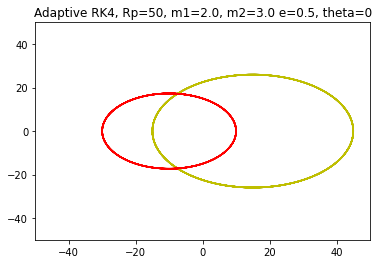

In [43]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-50,50)
plt.xlim(-50,50)
mtot=masses[0]+masses[1]
semimajor0=rad0*masses[1]/mtot
semimajor1=rad0*masses[0]/mtot
plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(hyperbfns.getxtheory(theta0,ecc0,semimajor0,t,1),hyperbfns.getytheory(theta0,ecc0,semimajor0,t,1),'b')
plt.plot(hyperbfns.getxtheory(theta0,ecc0,semimajor1,t,-1),hyperbfns.getytheory(theta0,ecc0,semimajor1,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

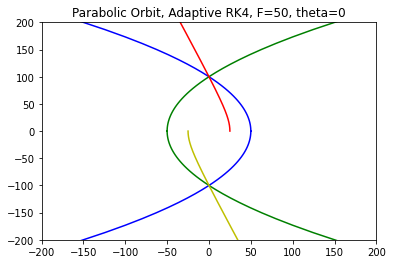

In [56]:
import matplotlib.pyplot as plt
t= np.linspace(0,2*math.pi,100)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
plt.title("Parabolic Orbit, Adaptive RK4, F="+str(rad0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(parabfns.getxtheory(theta0,ecc0,rad0,t,1),parabfns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(parabfns.getxtheory(theta0,ecc0,rad0,t,-1),parabfns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

Adaptive RK4 orbits run and superficially look correct. 

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2
oneellipse=int(len(npdt))
plt.ylim(-200,200)
plt.xlim(-200,200)
#plt.ylim(-1,1)
#plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-1,1)
plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'*y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-10,10)
plt.xlim(-25,-20)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
nperr

In [ ]:


plt.xlabel("timestep")
plt.ylabel("Rel err: 1/30 *|x2-x1|*(h'/h)^5")
plt.title("Relative error, RK4")
relerrplt,=plt.plot(np.arange(2,oneellipse),nperr[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))
plt.legend(handles=[relerrplt])
plt.show()

This curve should be constant and about equal to delta

In [ ]:


plt.xlabel("timestep number")
plt.ylabel("timestep size")
plt.title("Evolution of timestep with step")
relerrplt,=plt.plot(np.arange(2,oneellipse),npdt[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))

plt.show()

For appropriately set tolerances, adaptive timestep no longer has feedback issues. Tol=delta=0.0005 or less. The important thing is that this curve is smooth and has no constant regions where the value is pinned to either the maximum or minimum. We also seek reasonable starting values for the timestep. 

In [ ]:
plt.xlabel("x")
plt.ylabel("relative error")
plt.title("horizontal position vs relative error")
plt.plot(npstar1x[2:oneellipse,0], nperr[2:oneellipse],'b')
plt.show()

In [ ]:
plt.xlabel("y")
plt.ylabel("rel error")
plt.title("y vs rel error")
plt.plot(npstar1x[2:oneellipse,1],nperr[2:oneellipse])
plt.show()

In [ ]:
plt.xlabel("r")
plt.ylabel("rel error")
plt.title("r vs rel error")
rstar1x=np.sqrt(npstar1x[:,0]**2+npstar1x[:,1]**2)
plt.plot(rstar1x[2:oneellipse],nperr[2:oneellipse],'*b')
plt.show()

In [ ]:
plt.xlabel("t")
plt.ylabel("r")
plt.title("r vs t")
plt.plot(nptimes[2:oneellipse], rstar1x[2:oneellipse], '*b')
plt.show()

In [ ]:
thetaellipse = np.arctan2(npstar1x[2:oneellipse,1],npstar1x[2:oneellipse,0])

In [ ]:
plt.xlabel("t")
plt.ylabel("theta")
plt.title("theta vs t")
plt.plot(nptimes[2:oneellipse],thetaellipse,'b')
plt.show()

In [ ]:
plt.xlabel("theta")
plt.ylabel("rel error")
plt.title("rel error vs theta")
plt.plot(thetaellipse, nperr[2:oneellipse],'*b')
plt.show()


# Conservation of angular momentum

In [ ]:
import Lstability

In [ ]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,mass0)
deltaL, Lavg

In [ ]:
deltaL*Lavg

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [ ]:
import Estability

In [ ]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, mass0)
deltaE, Eavg

In [ ]:
deltaE*Eavg

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [ ]:
import orbitSymmetricTol

In [ ]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [ ]:
allcancelsx

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [ ]:
allcancelsa

In [ ]:
npstar1x

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [ ]:
import aeTest

In [ ]:
from matplotlib import pyplot as plt
plt.plot( np.abs(npstar1x[:,1]))

In [ ]:
def findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion):
    maxindex=len(npstar1x[:,1])
    apindex=np.argmin(np.abs(npstar1x[10:int(maxindex/2),1]))+1
    print(apindex)
    delta=math.floor(.2*apindex)
    print(delta)
    perindex=np.argmin(np.abs(npstar1x[delta:apindex-delta,1]))+delta
    print(perindex)
    print(apindex/perindex)
    if np.abs(apindex/perindex-2.)>0.05: 
        perindex=np.argmin(np.abs(npstar1x[apindex+delta:2*apindex+delta,1]))+delta+apindex
        print(perindex)
        apindex,perindex=perindex,apindex
        print(apindex,perindex)
        print(apindex/perindex)
    #apindex3=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    #apindex4=np.argmin(np.abs(npstar1x[100:apindex3-100,1]))+100
    #perindex=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    if useperihelion:
        apindex,perindex=perindex,apindex
    coordap=[npstar1x[apindex,0],npstar1x[apindex,1]]
    coordper=[npstar1x[perindex,0],npstar1x[perindex,1]]
    ra=np.sqrt(np.sum(np.array(coordap)**2))
    rp=np.sqrt(np.sum(np.array(coordper)**2))
    e=(ra-rp)/(ra+rp)
    a=1./2.*(ra+rp)
    deltae=np.abs(e-ecc0)/ecc0
    deltaa=np.abs(a-rad0)/rad0
    return apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
if theta0==0:
    apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa=findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion)

In [ ]:
if theta0!=0:
    perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

In [ ]:
apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
plt.plot(nptimes[:perindex],npstar1x[:perindex,1])

# Fit t as a function of the eccentric anomoly (angle from the center of the elipse)

In [ ]:
def findEccentricAnomoly(coordap, coordper):
    Ecenter=np.array(coordap)+np.array(coordper)
    Ecenter/=2.
    return Ecenter


In [ ]:
ellipsecenter=findEccentricAnomoly(coordap,coordper)

In [ ]:
ellipsecenter

In [ ]:
def getEllipsecenter(ecc,rad,theta, useperihelion):
    #ind of use perihelion
    rp=rad*(1-ecc)
    ra=-rad*(1+ecc)
    rcent=(rp+ra)/2
    #print(rp,ra,rcent)
    rcentx=rcent*np.cos(theta)
    rcenty=rcent* np.sin(theta)
    return [rcentx,rcenty]

In [ ]:
(np.array(coordap)+np.array(coordper))/2

In [ ]:
getEllipsecenter(ecc0,rad0,theta0, True)

In [ ]:
np.arctan2(-1.,0)/math.pi*180

In [ ]:
def getEang(npstar2x,ecc,rad,theta, useperihelion):
    ellipsecenter=getEllipsecenter(ecc,rad,theta, useperihelion)
    #print(ellipsecenter)
    #print(npstar1x)
    #print(npstar1x[:,0])
    xfortan=npstar2x[:,0]-ellipsecenter[0]
    yfortan=npstar2x[:,1]-ellipsecenter[1]
    #print("xy",xfortan,yfortan)
    Eang=np.arctan2(yfortan,xfortan)
    Eangtheta=2*np.arctan2(np.sqrt(1-ecc)*np.sin(theta/2.),np.sqrt(1+ecc)*np.cos(theta/2.))
    Eang-=Eangtheta
    #if useperihelion:
    #    Eang-=math.pi
    print(len(Eang))
    for i in np.arange(len(Eang)):
        #if xfortan[i]<0:
        #    Eang[i]+=math.pi
        if Eang[i]<0:
            Eang[i]+=2*math.pi
    print(xfortan,yfortan,Eang/math.pi*180)
    print("Eang",Eang)
    return xfortan, yfortan,Eang

In [ ]:
np.arctan2(-6.69327422*10**-6, -0.02240526)

In [ ]:
def xofeccanom(rad,Eang,ecc):
    return rad*(np.cos(Eang)+ecc)

In [ ]:
def yofeccanom(rad, Eang, ecc):
    b=getsemiminor(rad,ecc)
    return b*np.sin(Eang) 

In [ ]:
def tofEccAnom(npstar2x, rad,ecc,theta,mass, useperihelion):
    xE0,yE0,Eang=getEang(npstar2x,ecc,rad,theta, useperihelion)
    b=getsemiminor(rad,ecc)
    #fitval=rad*b*(Eang-ecc*np.sin(Eang))
    sgn=-1
    if useperihelion:
        sgn*=-1
    # added a factor of 2 in front of fitval
    fitval=rad**(1.5)*mass**(-.5)*(Eang-sgn*ecc*np.sin(Eang))
    fitval*=2
    print(Eang, ecc,rad,mass,fitval)
    return fitval

In [ ]:
def residualtEang(pars,nptimes,npstar2x):
    residual=np.abs(nptimes-tofEccAnom(npstar2x,pars['rad'],pars['ecc'],pars['theta'],pars['mass'],pars['useperihelion']))
    #print(nptimes, residual)
    return residual

In [ ]:
endindex=apindex
if useperihelion:
    endindex=perindex

In [ ]:
endindex

In [ ]:
xE0,yE0,Eang0=getEang(npstar2x[0:endindex-1,:],ecc0,rad0,theta0, useperihelion)

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
plt.plot(Eang0, xE0)

In [ ]:
plt.plot(Eang0, yE0)

In [ ]:
plt.plot(xE0,yE0)

In [ ]:
plt.plot(nptimesoneorbit,xE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0/xE0)

In [ ]:
np.arctan(0./1.)

In [ ]:
yE0[0]

In [ ]:
xE0[0]

In [ ]:
plt.plot(nptimesoneorbit,np.arctan2(yE0,xE0)*180/math.pi)

In [ ]:
Eangtest=tofEccAnom(npstar2x[0:endindex-1,:],rad0,ecc0,theta0,masses[0], useperihelion)

In [ ]:
np.max(Eangtest)

In [ ]:
nptimes[0]

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
tpredoneorbit=Eangtest[0:endindex-1]

In [ ]:
Eangoneorbit=Eang0[0:endindex-1]

In [ ]:
plt.plot(nptimesoneorbit,npstar2x[0:endindex-1,1])

In [ ]:
plt.plot(nptimesoneorbit,Eangoneorbit/math.pi*180)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit, label='times')
plt.xlabel("T timesteps")
plt.ylabel("T computed from angle")
plt.title("Times using start parameters")
plt.show()
plt.plot(nptimesoneorbit,tpredoneorbit-nptimesoneorbit, label='residual')
plt.legend()
plt.show()


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.scatter(nptimesoneorbit,tpredoneorbit)

In [ ]:
from lmfit import Minimizer,Parameters
pfittEang = Parameters()
pfittEang.add(name='theta', value=theta0, min=theta0-math.pi, max=theta0+math.pi, vary=True)
pfittEang.add(name='rad', value=rad0, min=0, vary=True)
pfittEang.add(name='ecc', value=ecc0, min=0, max=1.0, vary=True)
pfittEang.add(name='mass', value=masses[0], vary=False)
pfittEang.add(name='useperihelion', value=True, vary=False)

minit = Minimizer(residualtEang, pfittEang, fcn_args=(nptimesoneorbit,npstar2x[:endindex-1,:]))

outt = minit.leastsq()

In [ ]:
outt

Semimajor axis fit is good to about .1 percent at an eccentricity of 0.5. rad=49.886512 for delta=0.0001. rad=49.8863857 for delta = 0.0005. ecc = 0.51764747 for delta = 0.0001. ecc = 0.51765166 for delta = 0.0005. so both ecc and rad improve with a smaller delta, but not quickly. The program runs very slowly for large delta and requires 500000 timesteps for delta=0.0001. 

In [ ]:
tfinal=nptimesoneorbit[endindex-2]
tfinal

In [ ]:
from scipy.fft import fft

In [ ]:
from scipy.signal import blackman
wndow=blackman(len(nptimesoneorbit))

In [ ]:
ftresiduals=fft(nptimesoneorbit-tpredoneorbit)

In [ ]:
xf = np.linspace(0.0, 1.0/(2.0*dt), len(nptimesoneorbit)//2)

In [ ]:
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:len(nptimesoneorbit)//2]), '-b')

In [ ]:
ftr=fft(np.sqrt(npstar1x[:endindex-1,0]**2+npstar1x[:endindex-1,1]**2))

In [ ]:
plt.xlabel("frequency")
plt.ylabel("Fourier transform of t(E)")
plt.title("Fourier transform of time computed from eccentric anomaly")
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftr[1:len(nptimesoneorbit)//2]), '-b')

This is the fourier transform of the triangle wave.

In [ ]:
plt.title("Fourier transform of residuals of times")
plt.xlabel("frequency")
plt.ylabel("FT(t(E))")
plt.semilogy(xf[1:50], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:50]), '-b')

In [ ]:
plt.xlabel("bin number")
plt.ylabel("FT(t(E))")
plt.title("Fourier transform of residuals of times")
plt.semilogy(np.arange(1,30), 2.0/len(nptimesoneorbit[:29]) * np.abs(ftresiduals[1:30]), '*b')

Peak at the second harmonic and the sixth harmonic. The second harmonic seems natural due to the symmetry of the orbit but the sixth harmonic is harder to explain. 

Implementing the Adaptive RK4 hasn't changed the fit, residuals, or harmonics, sadly. There is still a 2% error in the fit for an eccentricity of 0.5